In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')

# First things first : Let's see which people the survey reached

# Where are the participants from ?

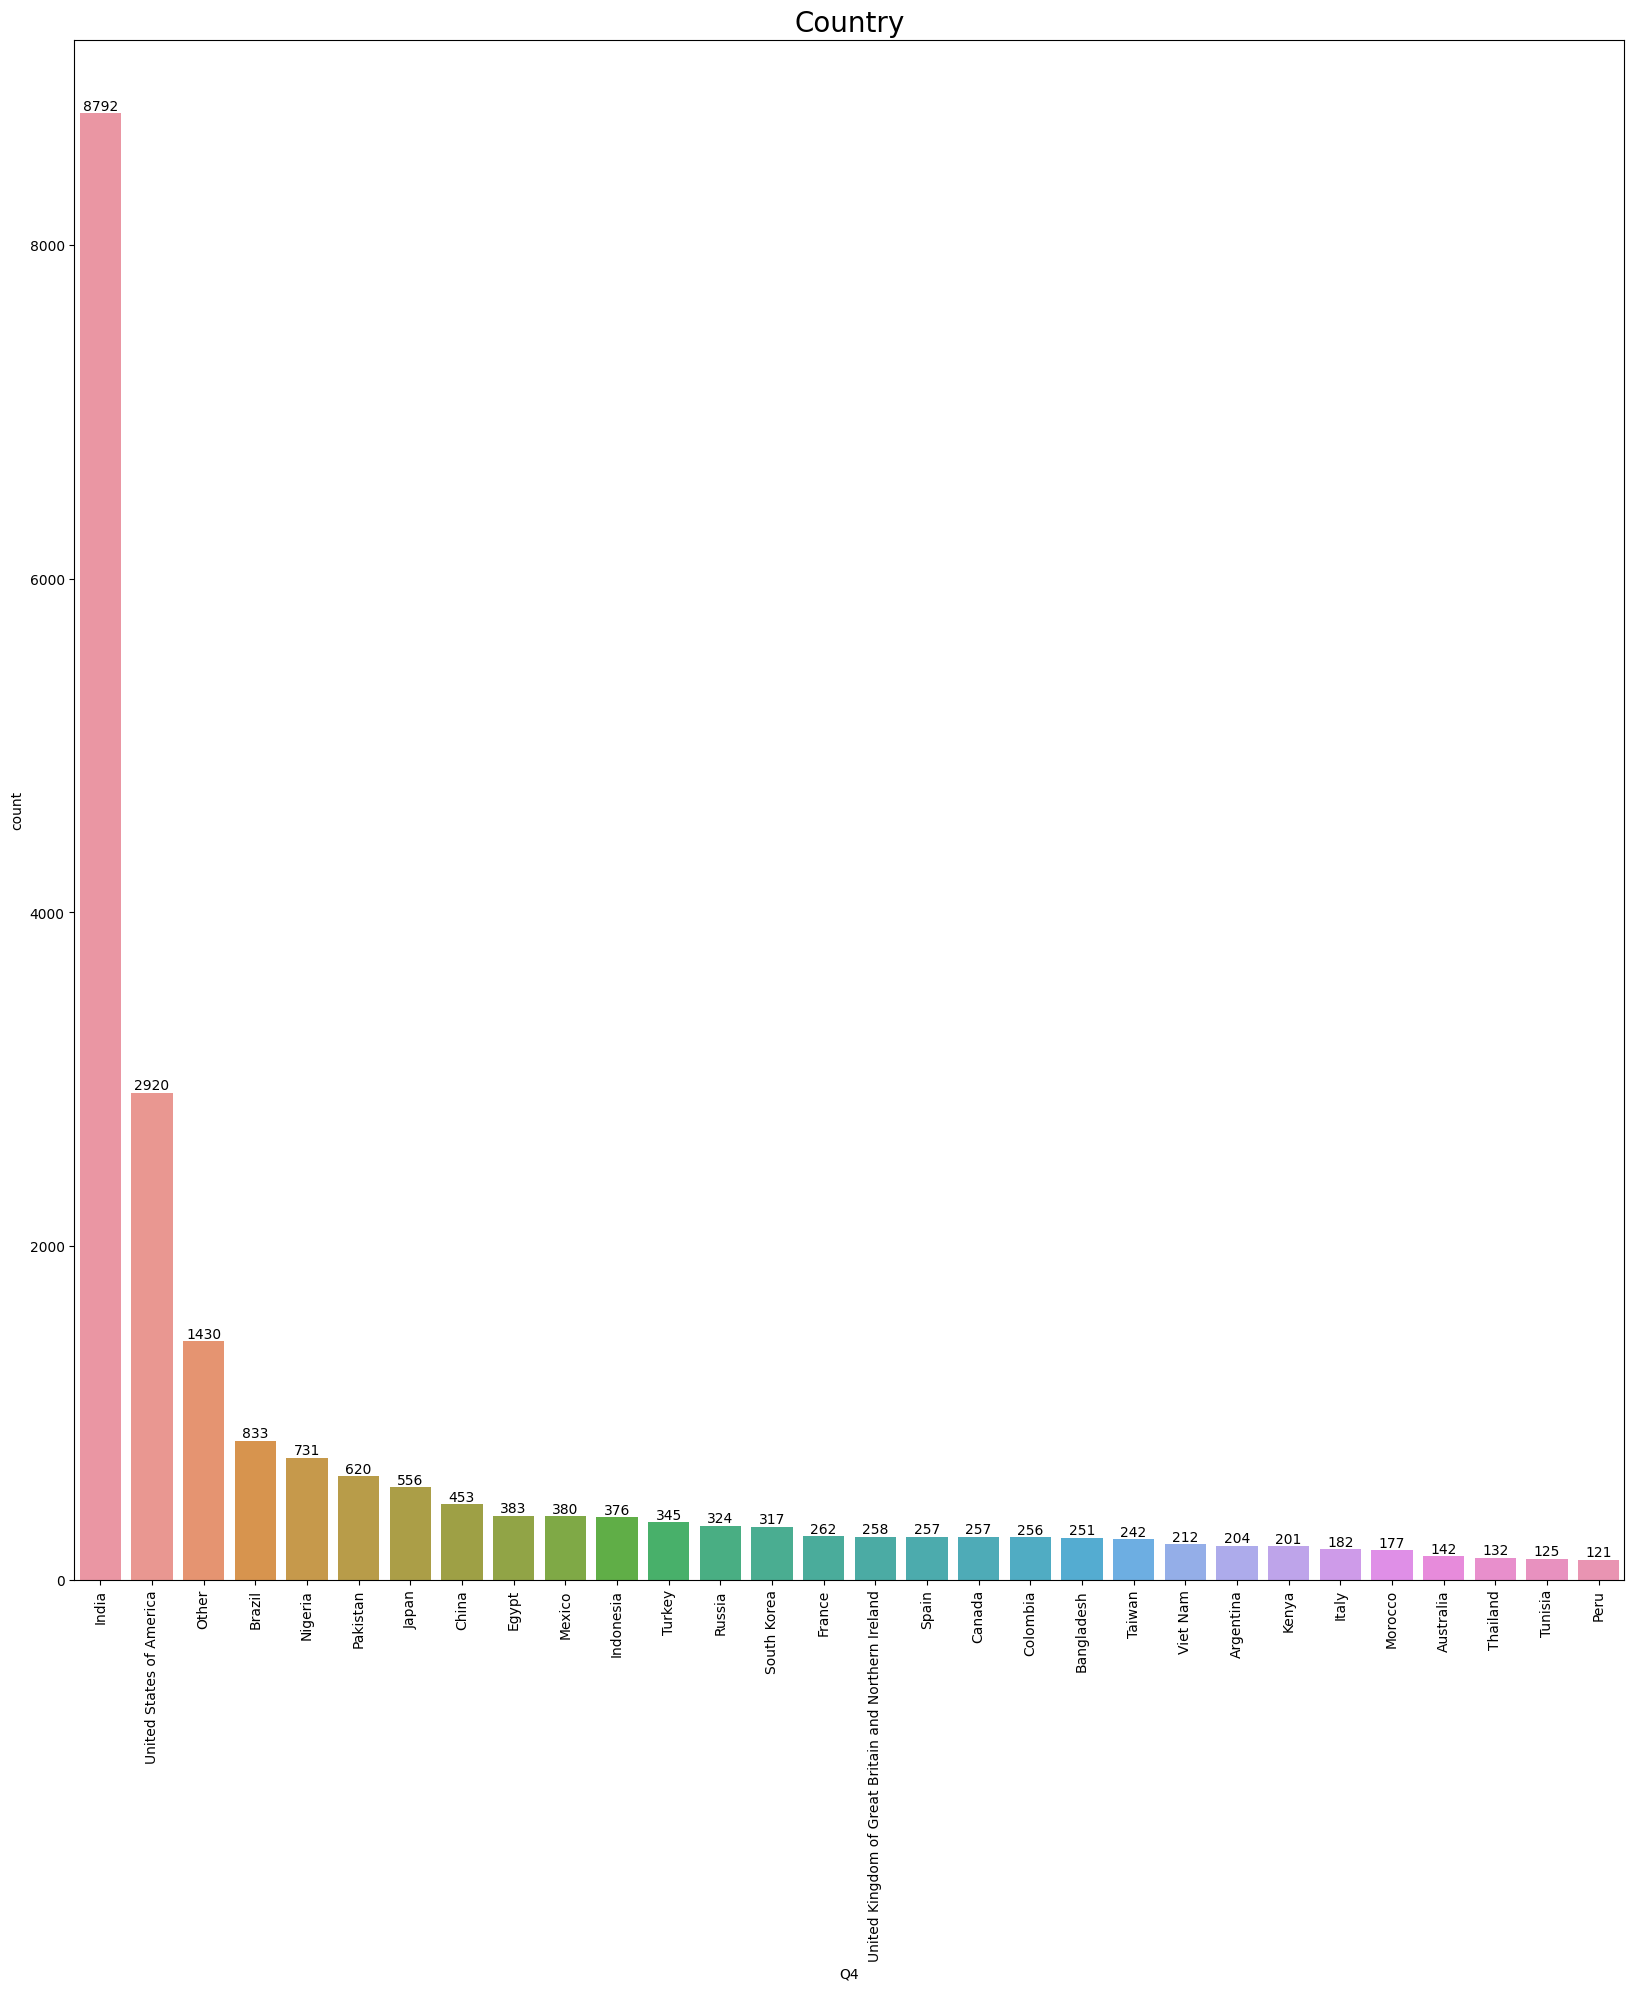

In [3]:
custom_palette = sns.color_palette("Paired", 15)
sns.set_palette(custom_palette)
plt.figure(figsize=(20,20))
ax = sns.countplot(x="Q4", data=df.iloc[1:], order=df['Q4'].iloc[1:].value_counts().index[:30])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Country', fontsize=20)
plt.show()


# Visualizing them on the world map would be cooler right ?

In [4]:
countries = df.groupby(['Q4']).size().reset_index().rename(columns={0: 'count'})
plt.figure(figsize=(15,15))
fig = px.choropleth(countries, locations="Q4", locationmode="country names",
                    color="count",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title="Participating countries on the world map"
)
fig.show()

<Figure size 1500x1500 with 0 Axes>

# Let's check how the genders were reached as well

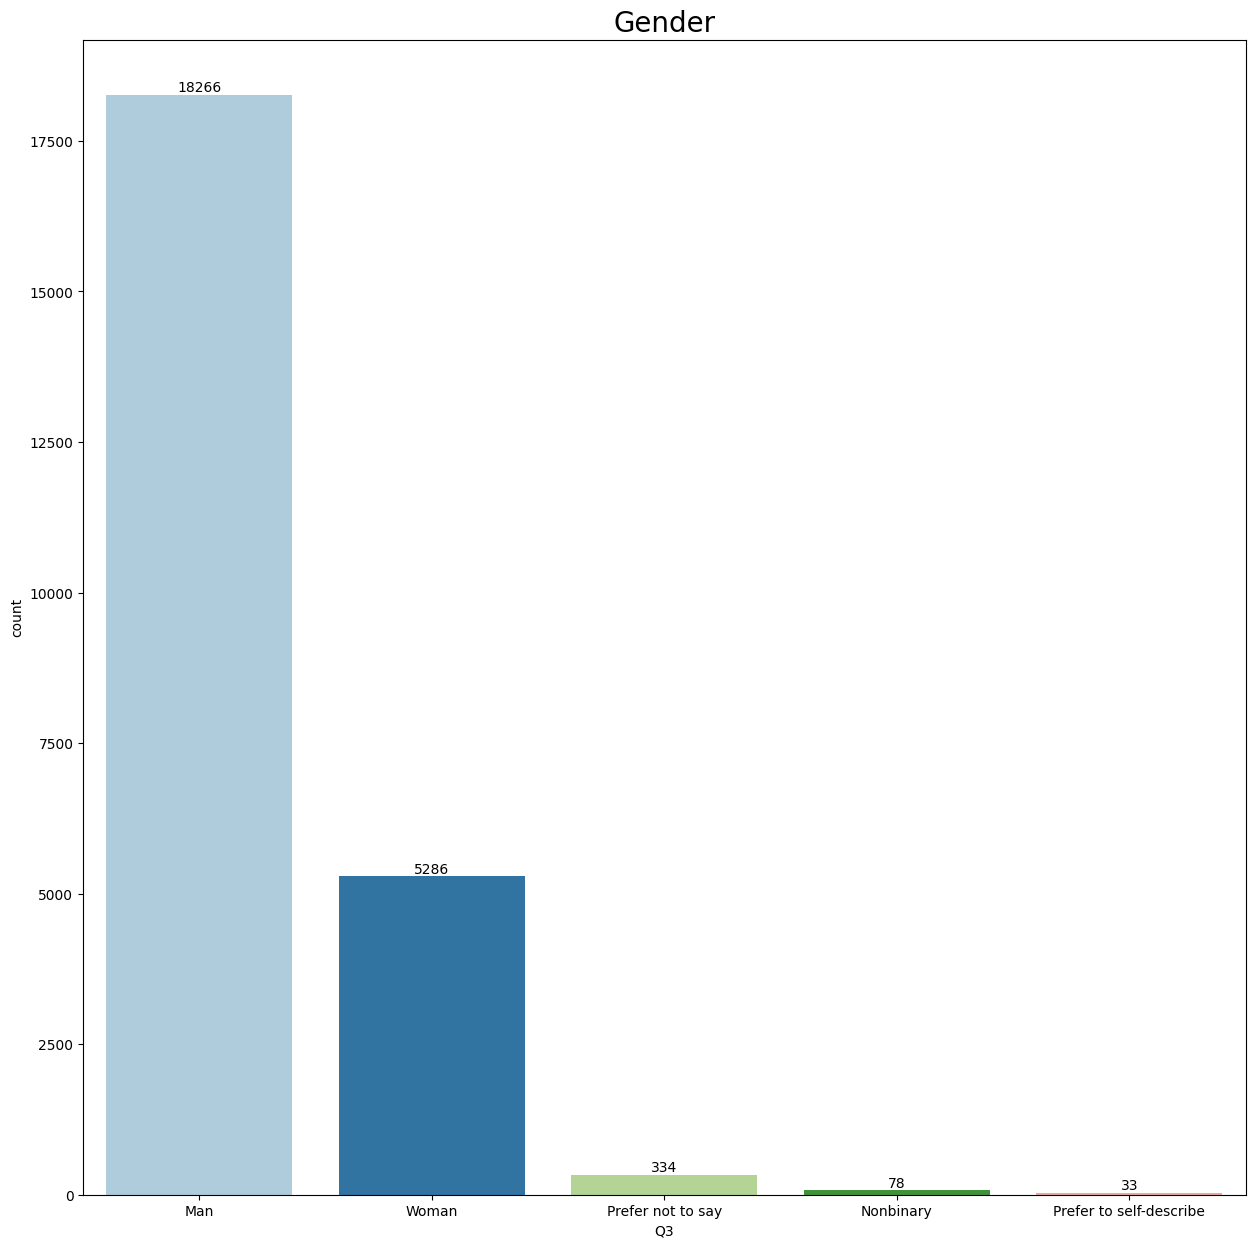

In [5]:
custom_palette = sns.color_palette("Paired", 5)
sns.set_palette(custom_palette)
plt.figure(figsize=(15,15))
ax = sns.countplot(x="Q3", data=df.iloc[1:], order=df['Q3'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Gender', fontsize=20)
plt.show()


# What about the age of the participants ?

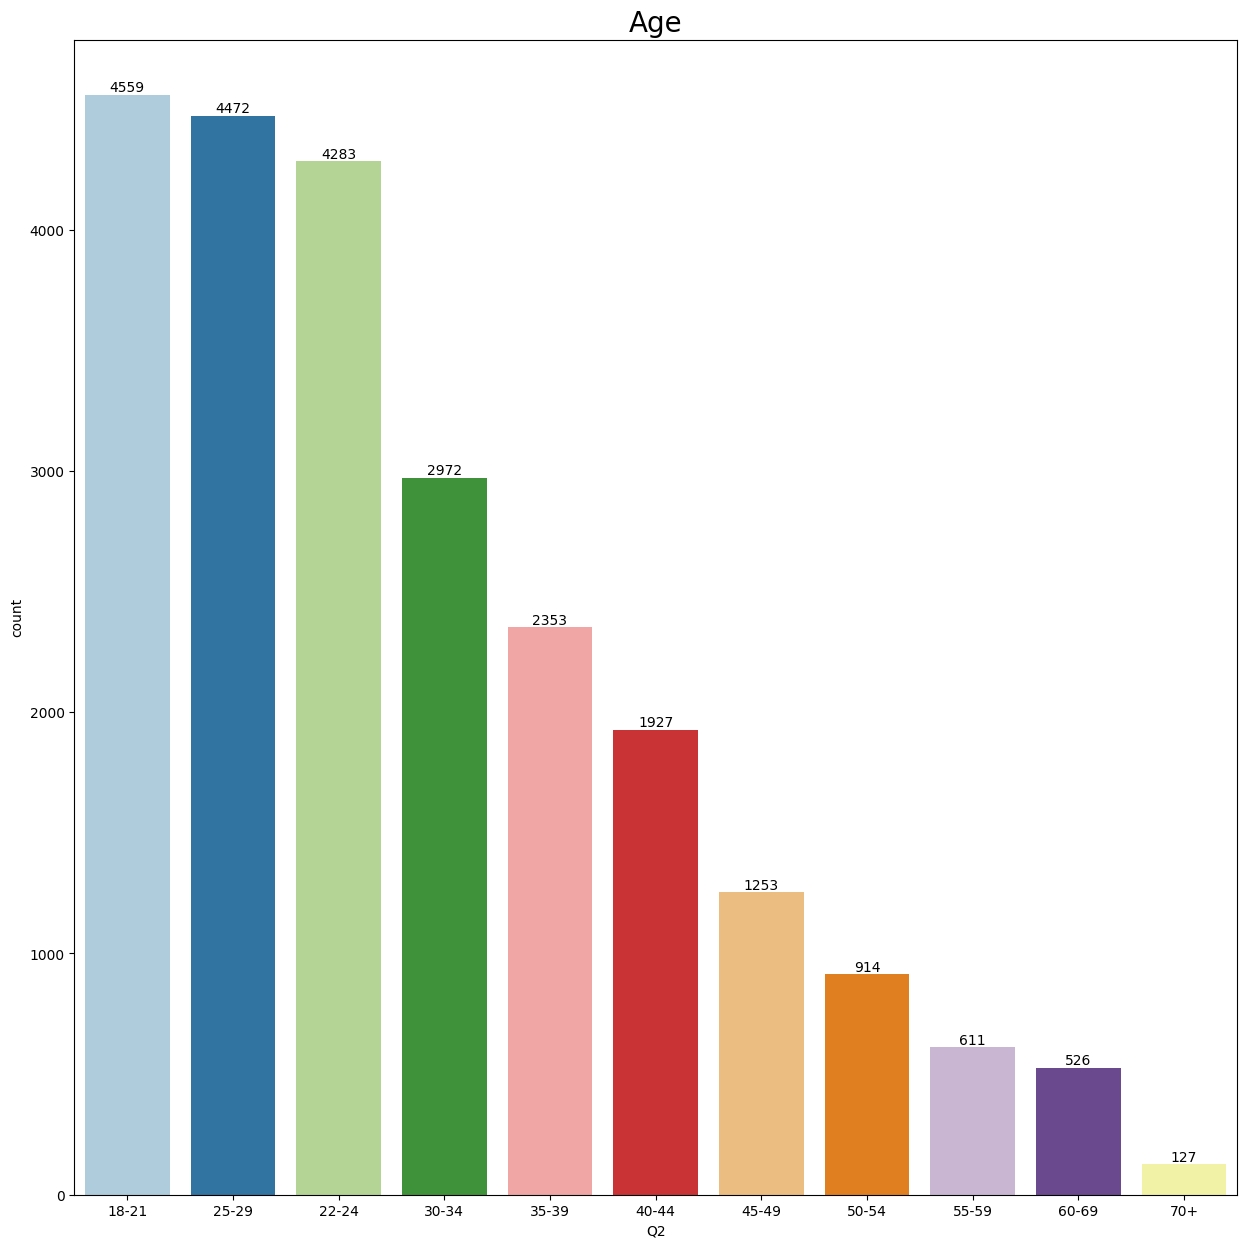

In [6]:
custom_palette = sns.color_palette("Paired", 11)
sns.set_palette(custom_palette)
plt.figure(figsize=(15,15))
ax = sns.countplot(x="Q2", data=df.iloc[1:], order=df['Q2'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Age', fontsize=20)
plt.show()

# What if we were to look at the age and the gender at the same time ?

In [7]:
fig = px.bar( df.iloc[1:].groupby(['Q2', 'Q3']).size().reset_index().rename(columns={0: 'count'}), x="Q2", y="count", color="Q3", title="Age and Gender",labels={'Count':'No. of Participants','Q2':'Age','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.show()

# Any students over here ?

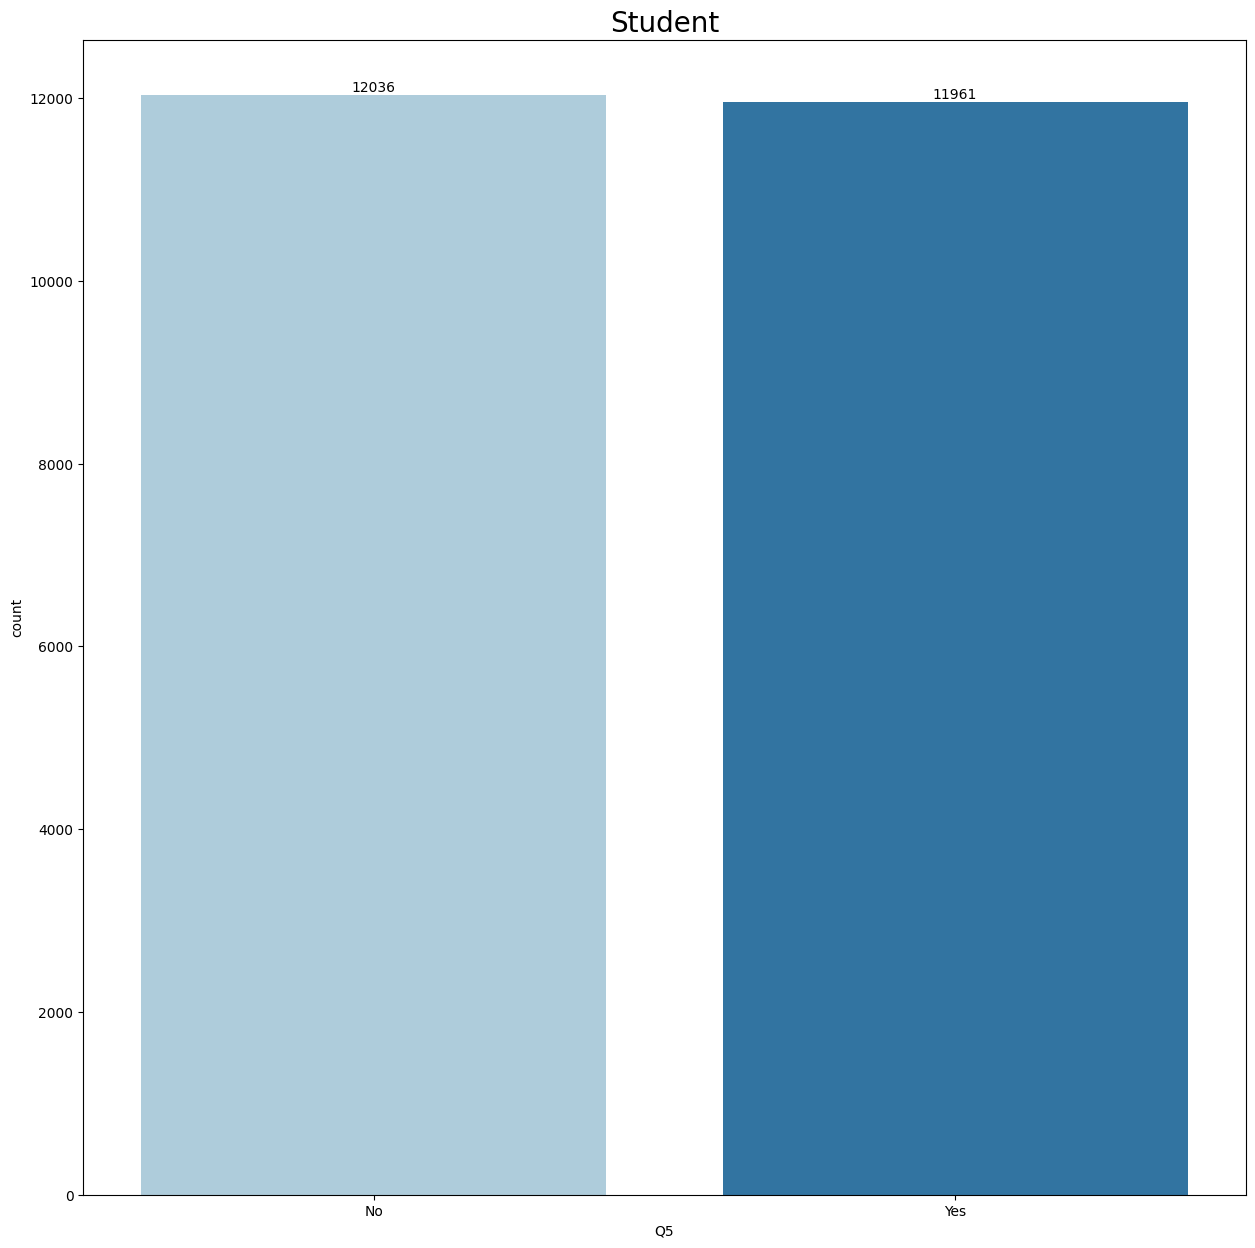

In [8]:
custom_palette = sns.color_palette("Paired", 2)
sns.set_palette(custom_palette)
plt.figure(figsize=(15,15))
ax = sns.countplot(x="Q5", data=df.iloc[1:], order=df['Q5'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Student', fontsize=20)
plt.show()

# Too many countplots? Let's visualize the degree and level of experience in machine learning in a donut chart.

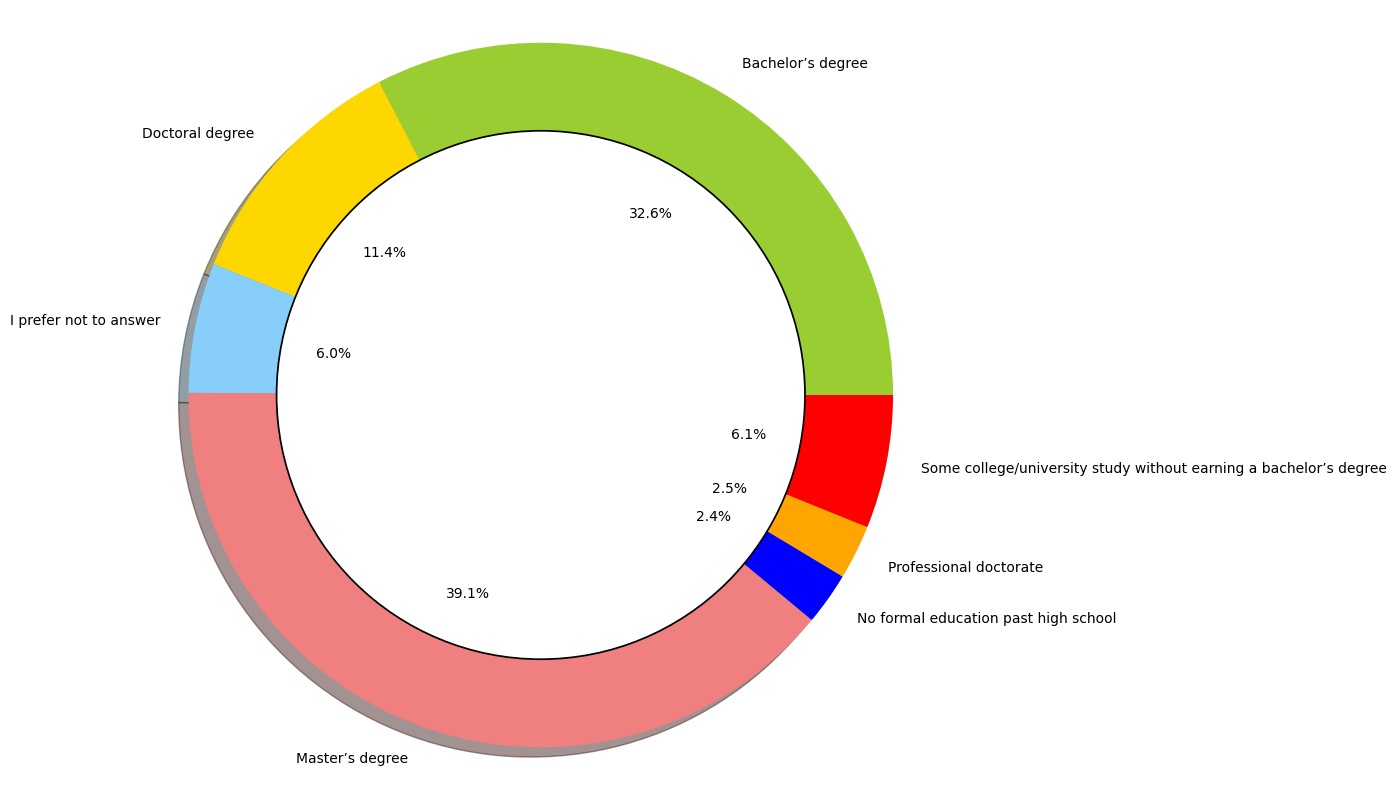

In [9]:
degree = df.iloc[1:].groupby(['Q8']).size().reset_index().rename(columns={0: 'count'})
labels = degree["Q8"].unique()
sizes = degree["count"]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'orange', 'red']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

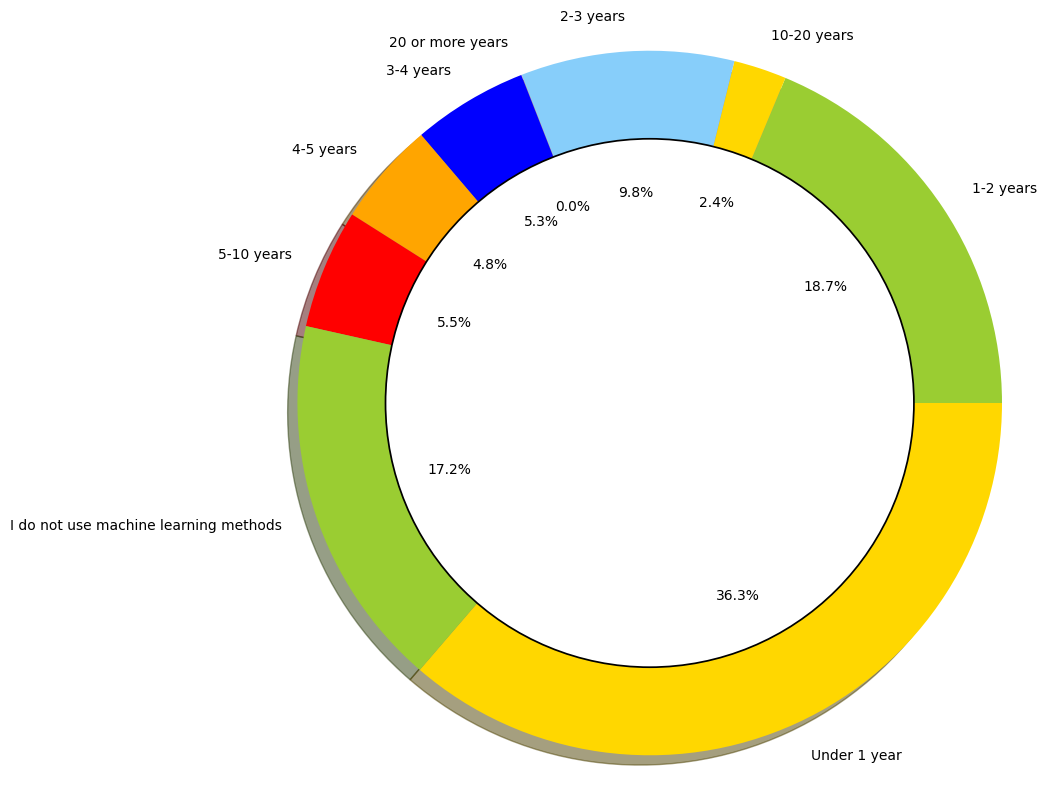

In [10]:
degree = df.iloc[1:].groupby(['Q16']).size().reset_index().rename(columns={0: 'count'})
labels = degree["Q16"].unique()
sizes = degree["count"]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'blue', 'orange', 'red']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

# Let's see where the participants started their journey of data science (on which platform)

Small additional functions for the questions with multiple answers.

In [11]:
def split_question(question_number):
  question = [x for x in df.iloc[1:] if x.split('_')[0] == f'Q{question_number}']
  dict_answers = {}
  for answer in question:
    name_key = np.unique(df.iloc[1:][answer].dropna().values)[0]
    dict_answers[name_key] = df.iloc[1:][answer].count()
  return dict_answers


Function which creates a nested dictionnary with keys representing the number of the question and sub-dictionnary containing for each possible answer the count.

In [12]:
def split_multiple_questions(df):
  dictionnaire_questions = {}
  for column_name in df.columns:
    question_number = column_name.split('_')[0][1:]
    if ('_' in column_name) and (question_number not in dictionnaire_questions.keys()):
      dictionnaire_questions[question_number] = split_question(question_number)
  return dictionnaire_questions

In [13]:
answers = split_multiple_questions(df)

Let's put our dictionnary in a dataframe for ease of manipulation.

In [14]:
def get_df_from_dict(question_number, dict_):
  list_ = []
  for key in dict_.keys():
    list_ += [key] * dict_[key]
  return pd.DataFrame(list_, columns=[f"Q{question_number}"])


# Finally let's visualize where you made your first step into the journey of data science (on which platform)

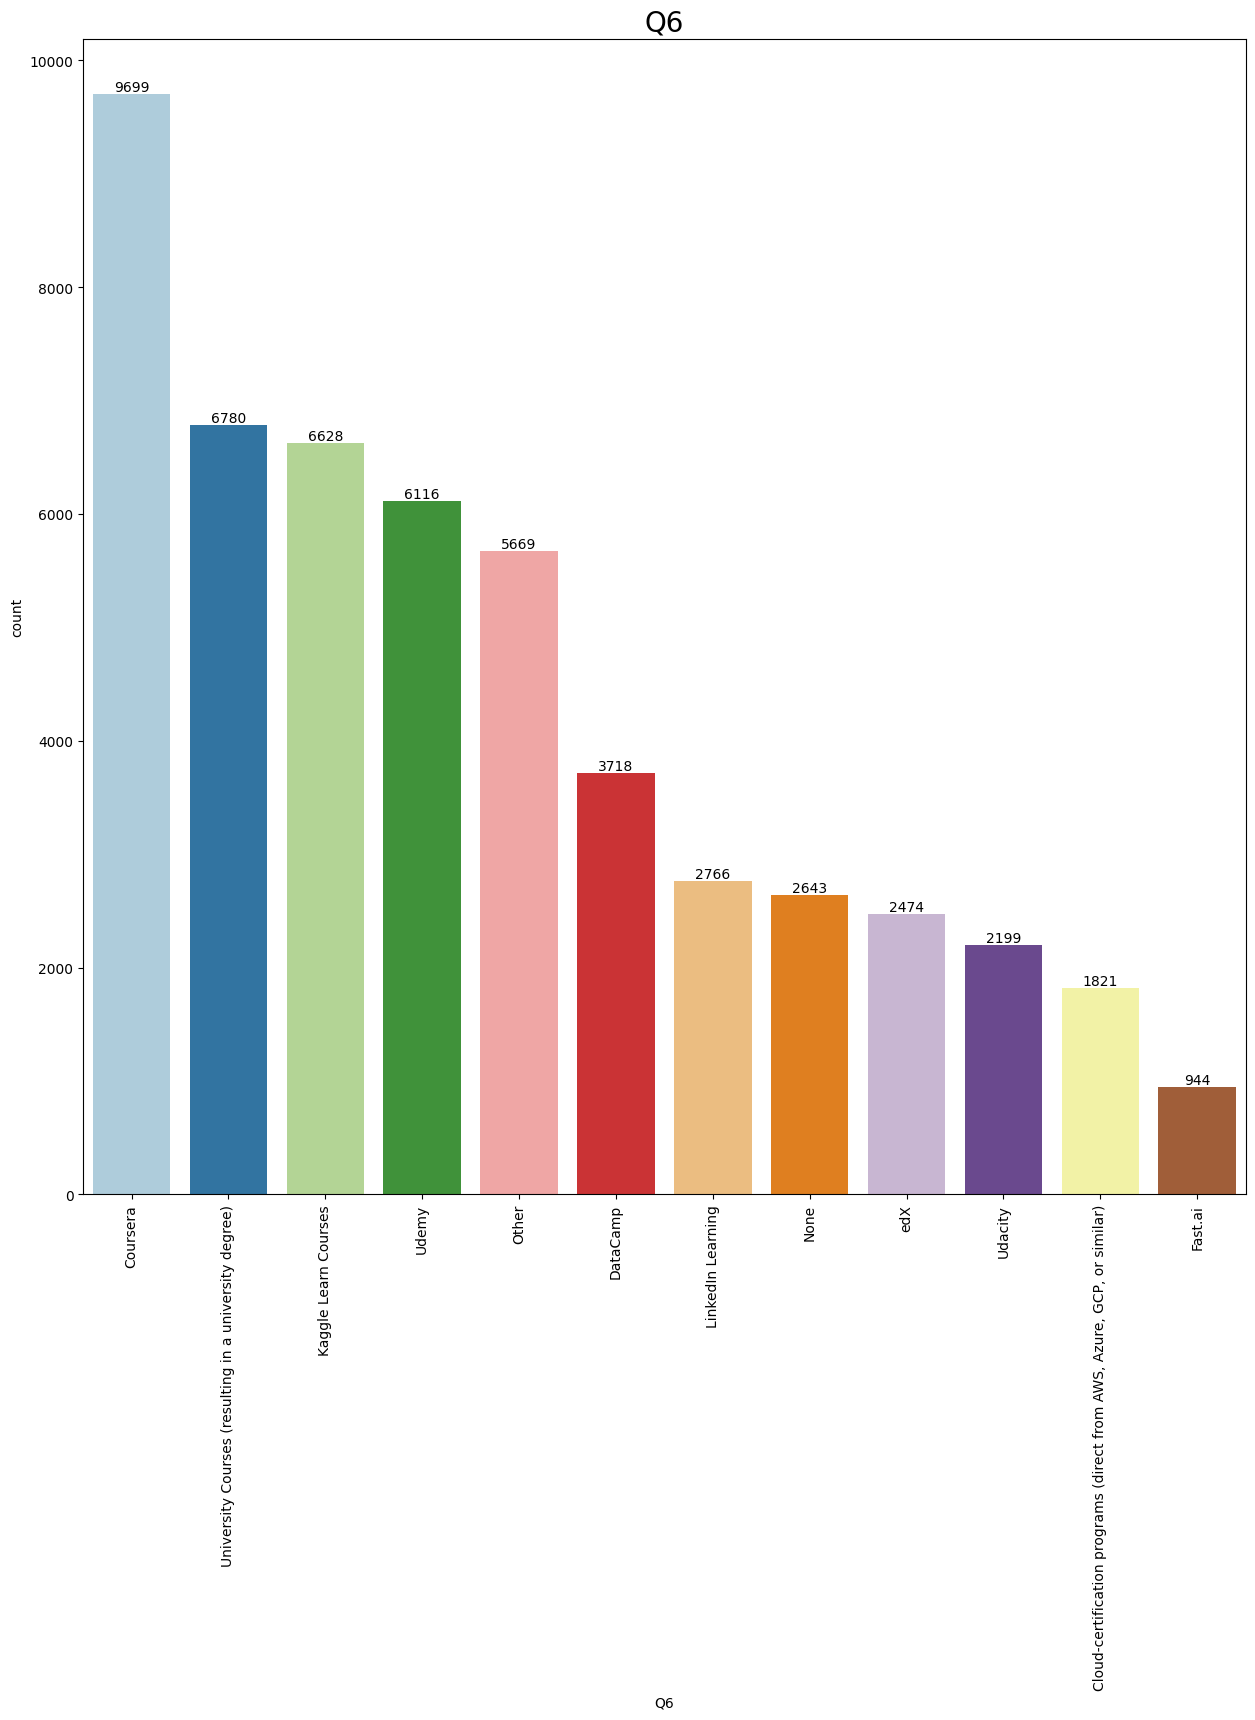

In [15]:
def display_histogram(question_number, answers):
  df = get_df_from_dict(question_number, answers)

  custom_palette = sns.color_palette("Paired", len(answers))
  sns.set_palette(custom_palette)
  plt.figure(figsize=(15,15))
  ax = sns.countplot(x=f"Q{question_number}", data=df, order=df[f"Q{question_number}"].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.xticks(rotation=90)
  plt.title(f"Q{question_number}", fontsize=20)
  plt.show()

display_histogram(6, answers["6"])

# It's one thing to try a platform, what matters is how much it helped you

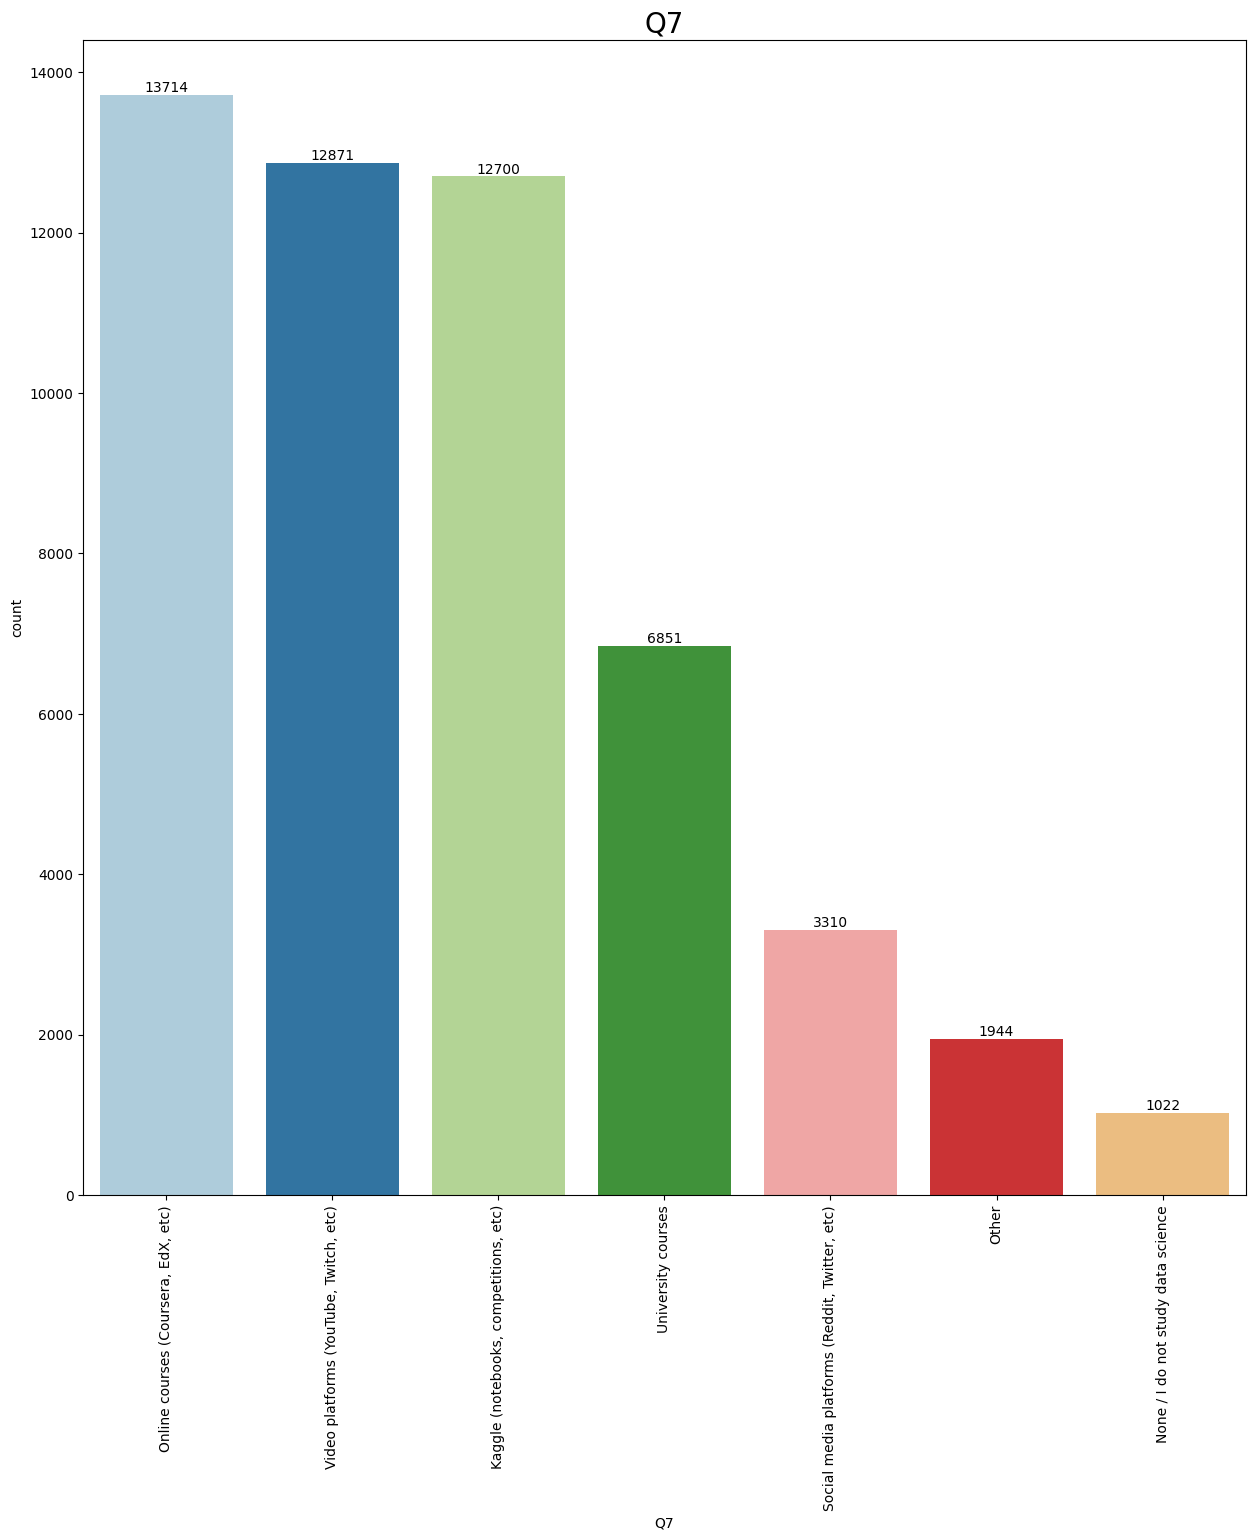

In [16]:
display_histogram(7, answers["7"])

# Let's give a clap for the researchers out there

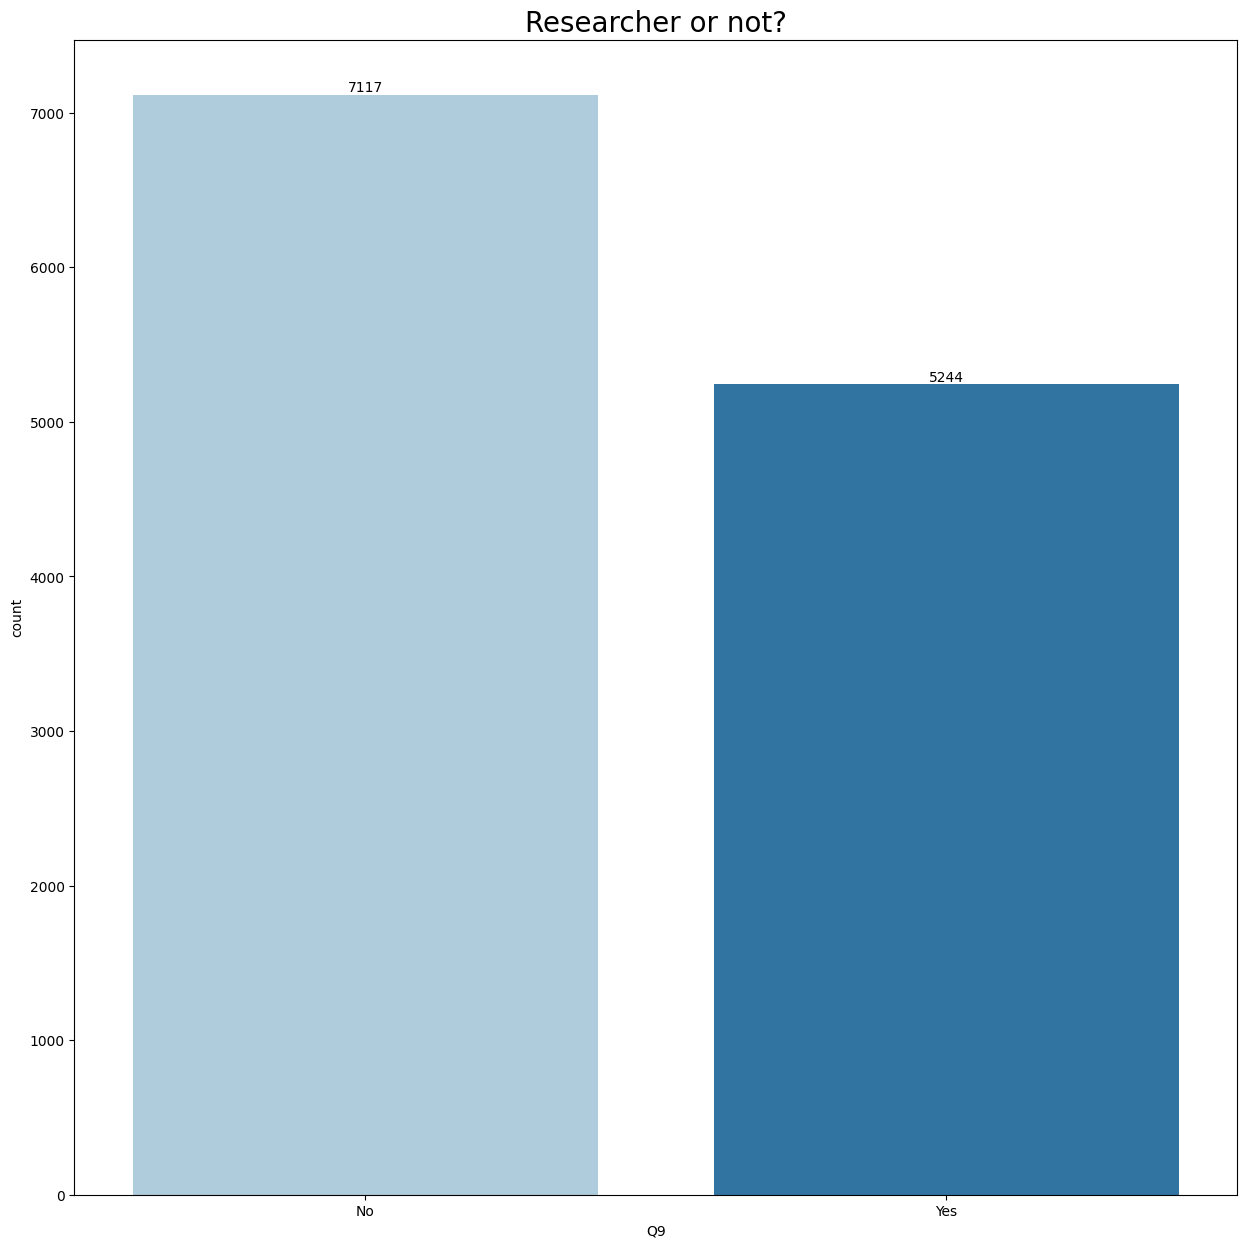

In [17]:
custom_palette = sns.color_palette("Paired", 2)
sns.set_palette(custom_palette)
plt.figure(figsize=(15,15))
ax = sns.countplot(x="Q9", data=df.iloc[1:], order=df['Q9'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Researcher or not?', fontsize=20)
plt.show()

# Quick question : How many of you used machine learning in your research

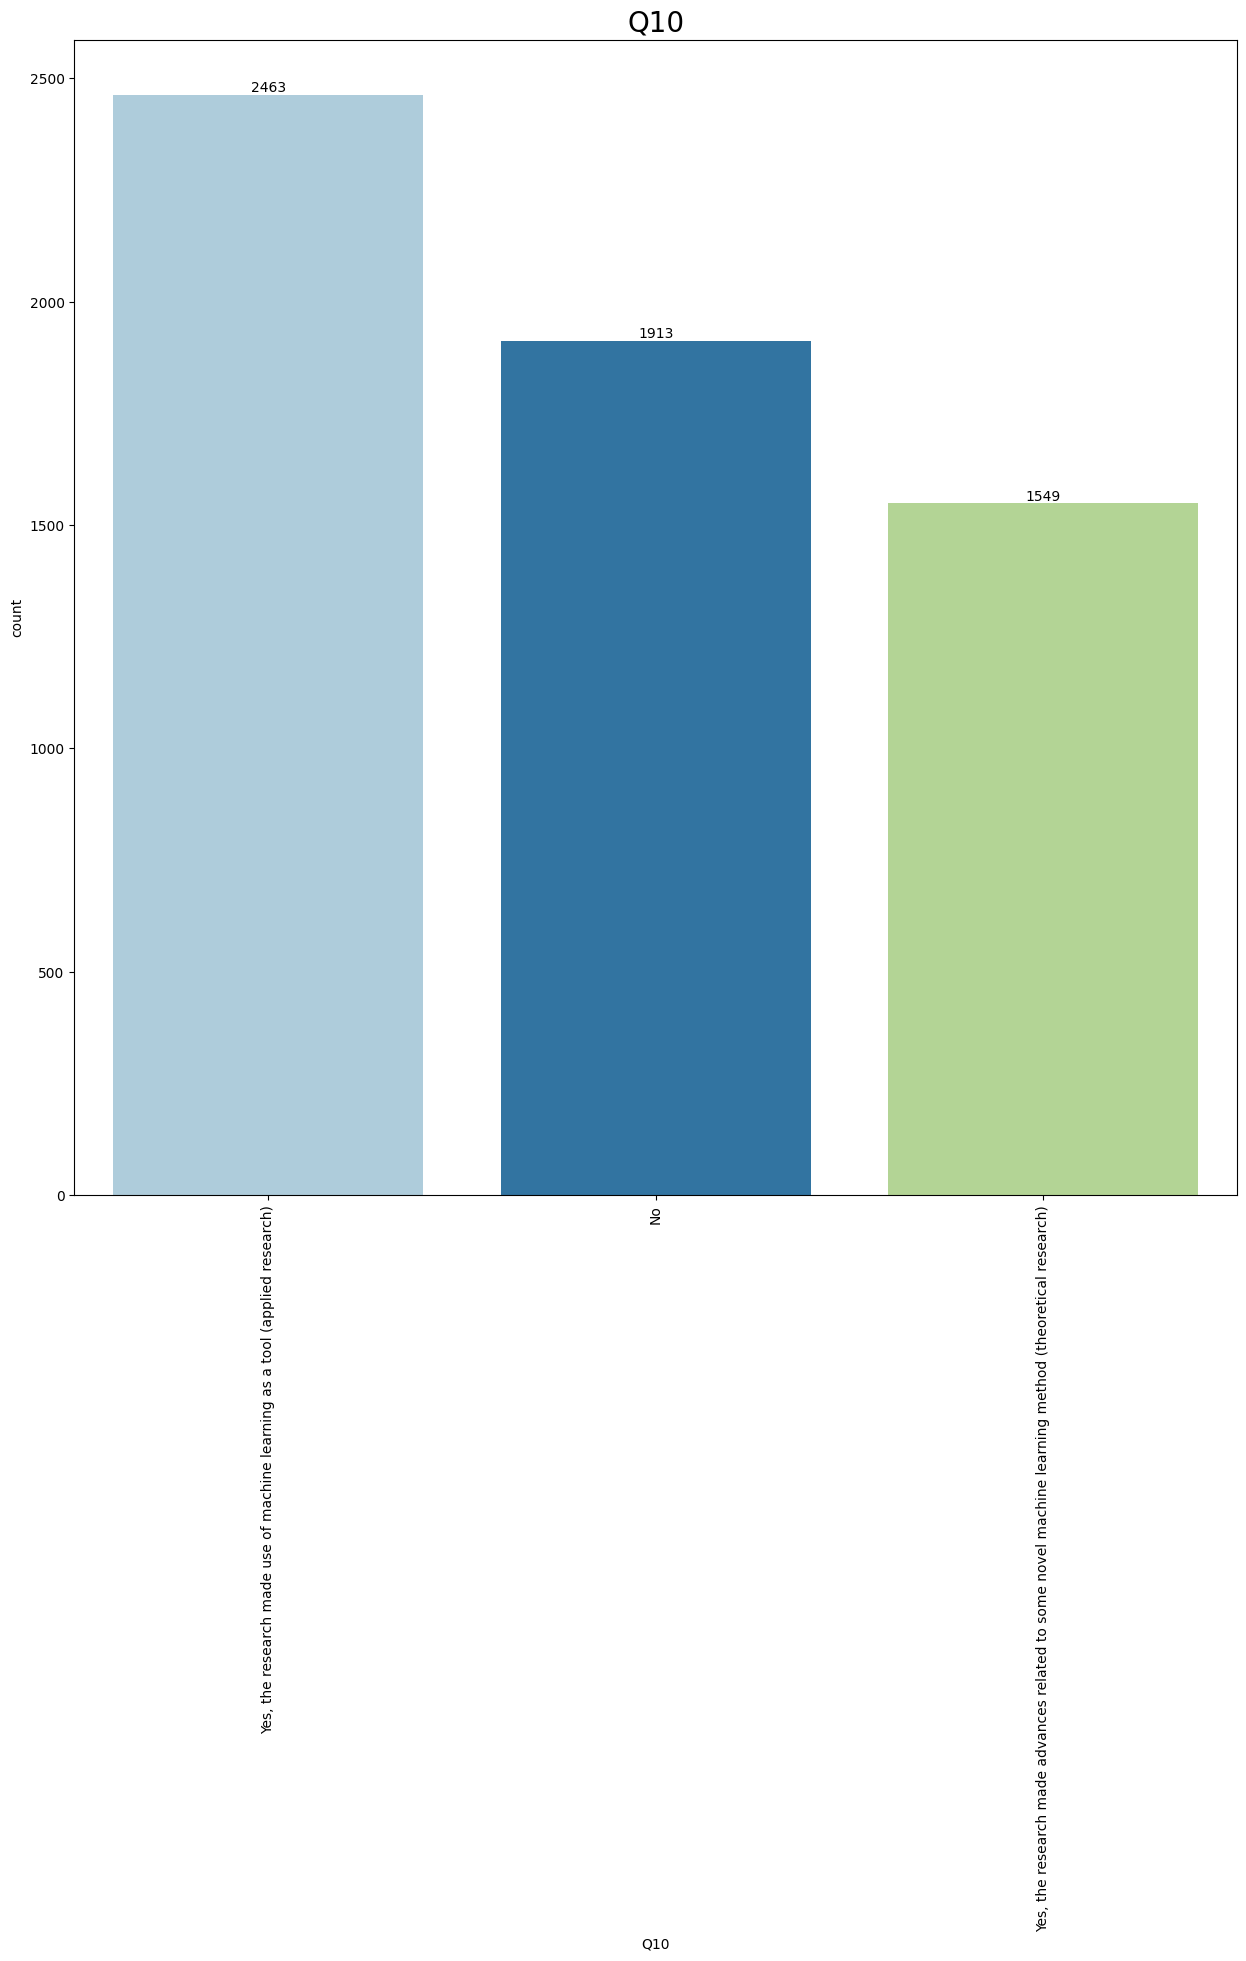

In [18]:
display_histogram(10, answers["10"])

# We know you all love to code so we were wondering how many years you devoted yourself to coding

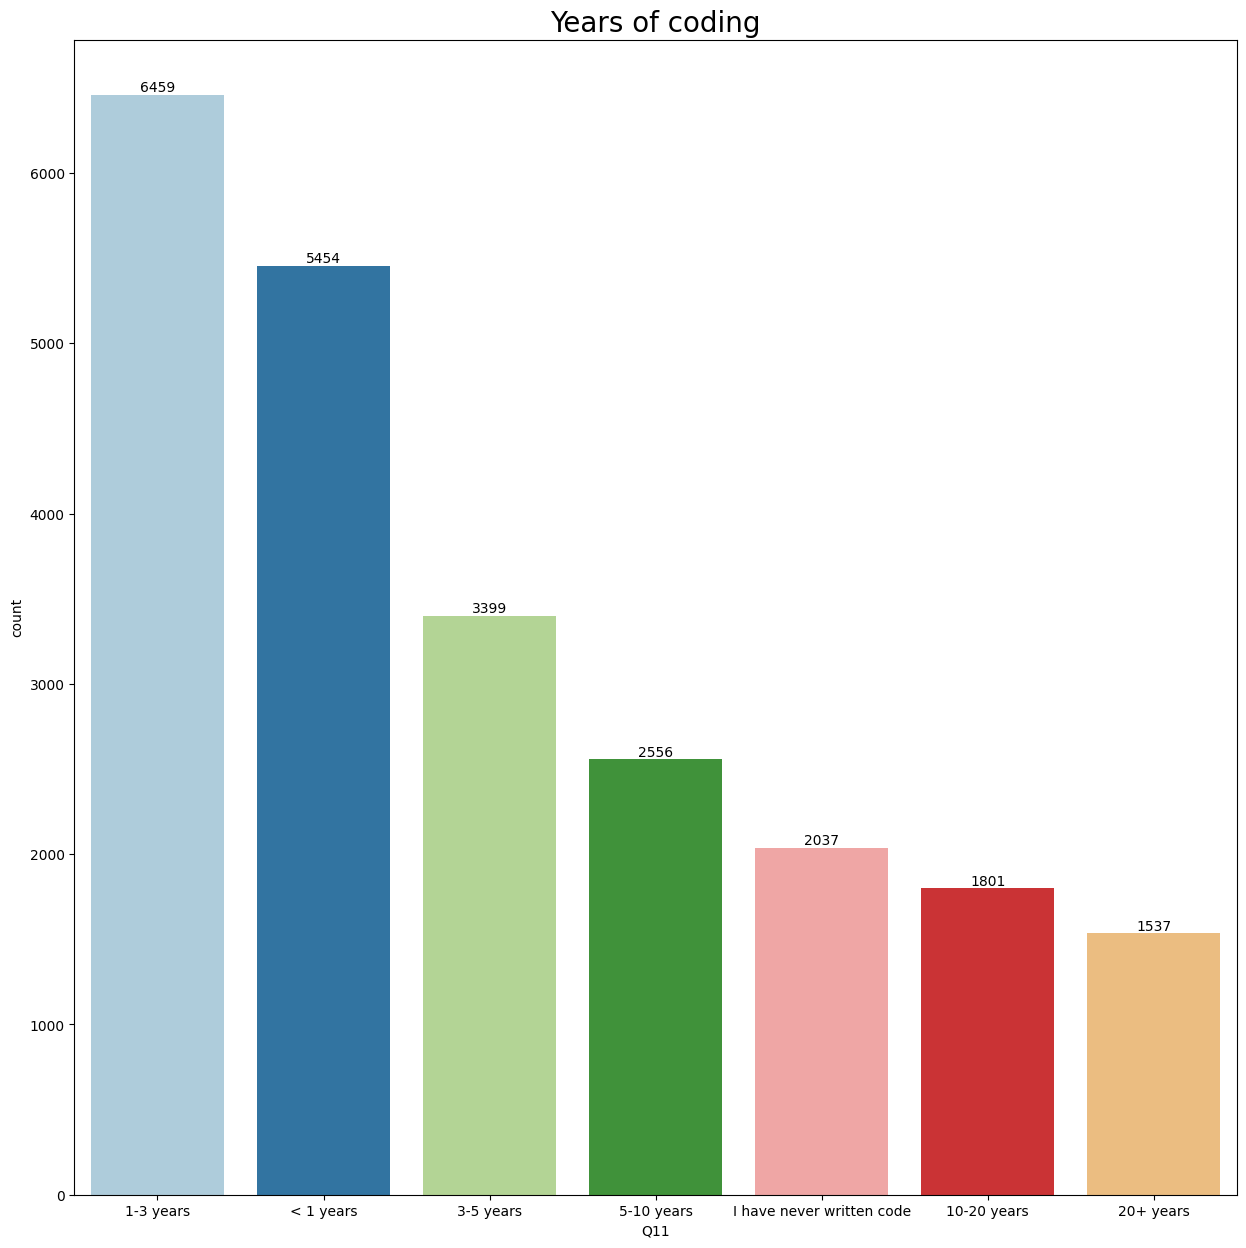

In [19]:
custom_palette = sns.color_palette("Paired", 7)
sns.set_palette(custom_palette)
plt.figure(figsize=(15,15))
ax = sns.countplot(x="Q11", data=df.iloc[1:], order=df['Q11'].iloc[1:].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Years of coding', fontsize=20)
plt.show()

# What if we coupled your years of coding with your age

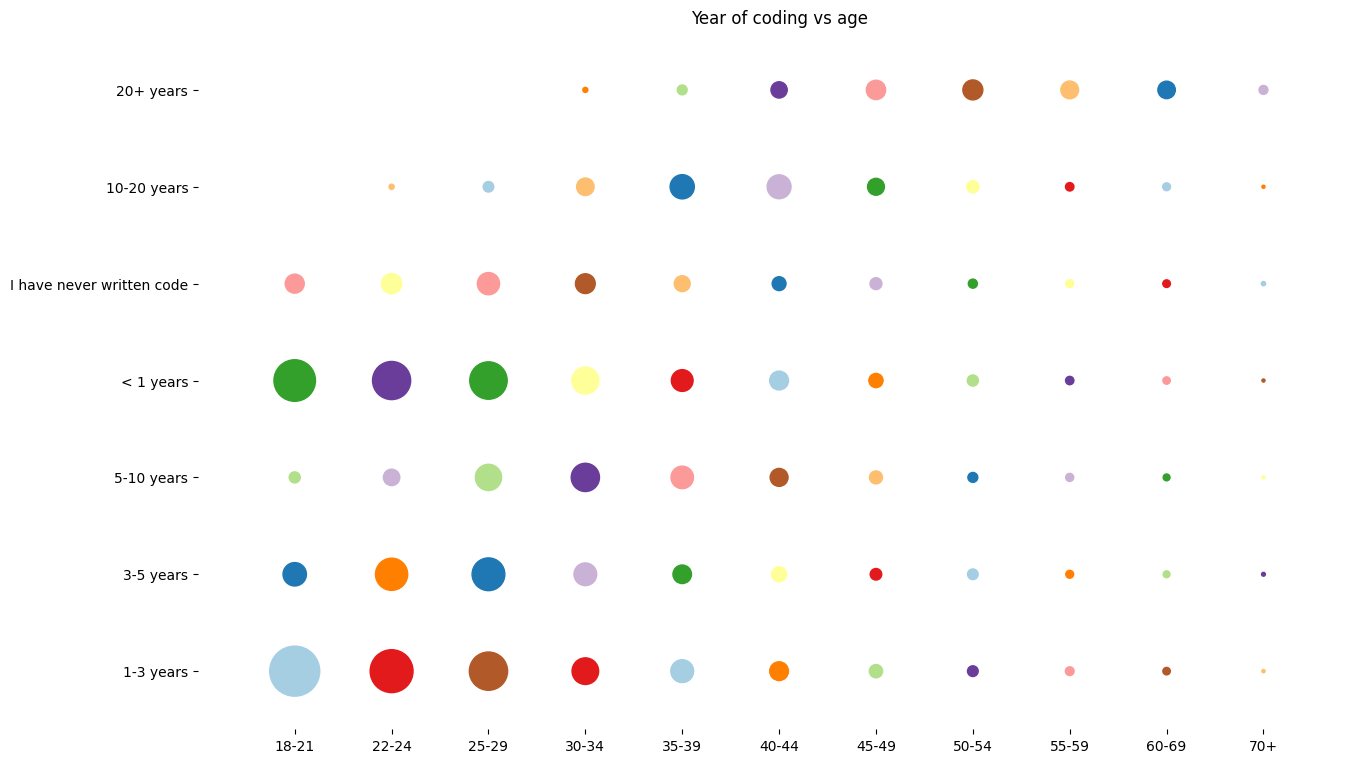

In [20]:
x = 'Q2'
y = 'Q11'


custom_palette = sns.color_palette("Paired", 73)

df_counts = df.iloc[1:].groupby([x, y]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

scale = 200*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y, size, data=df_counts, c=[c for c in custom_palette])
ax.set_frame_on(False)
plt.title("Year of coding vs age")
ax.margins(x=0.1, y=0.1)
ax.set_aspect('equal')

###

# What programming language you use on a daily basis ?

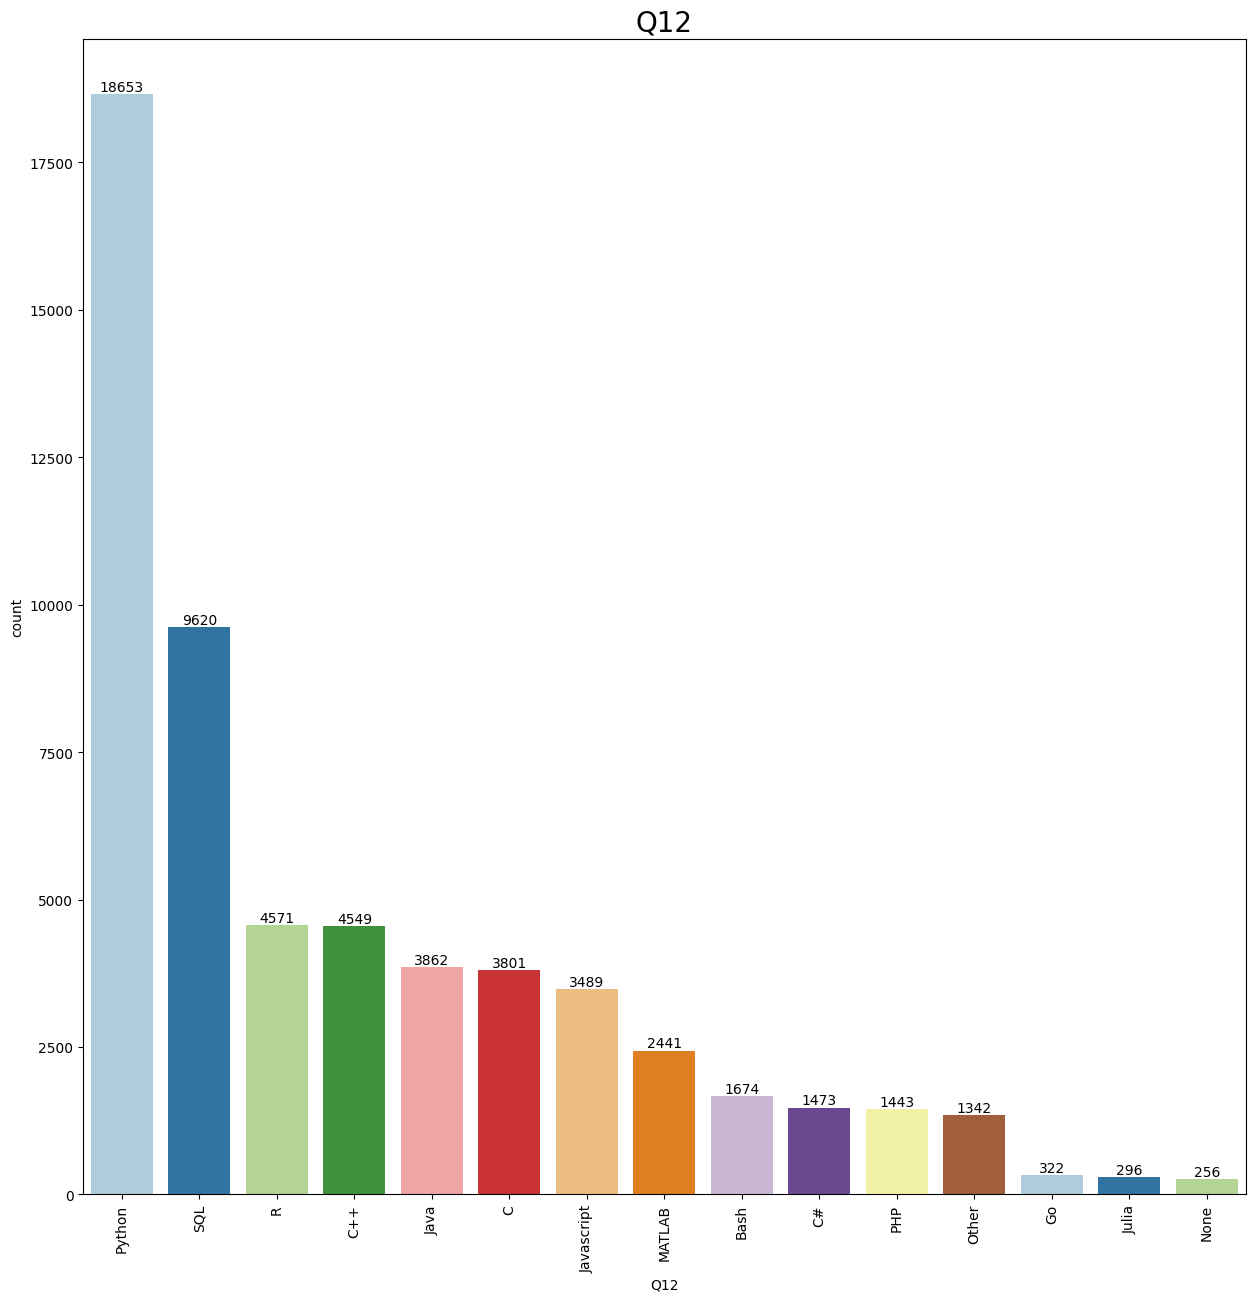

In [21]:
display_histogram(12, answers["12"])

# What about your favorite IDE?

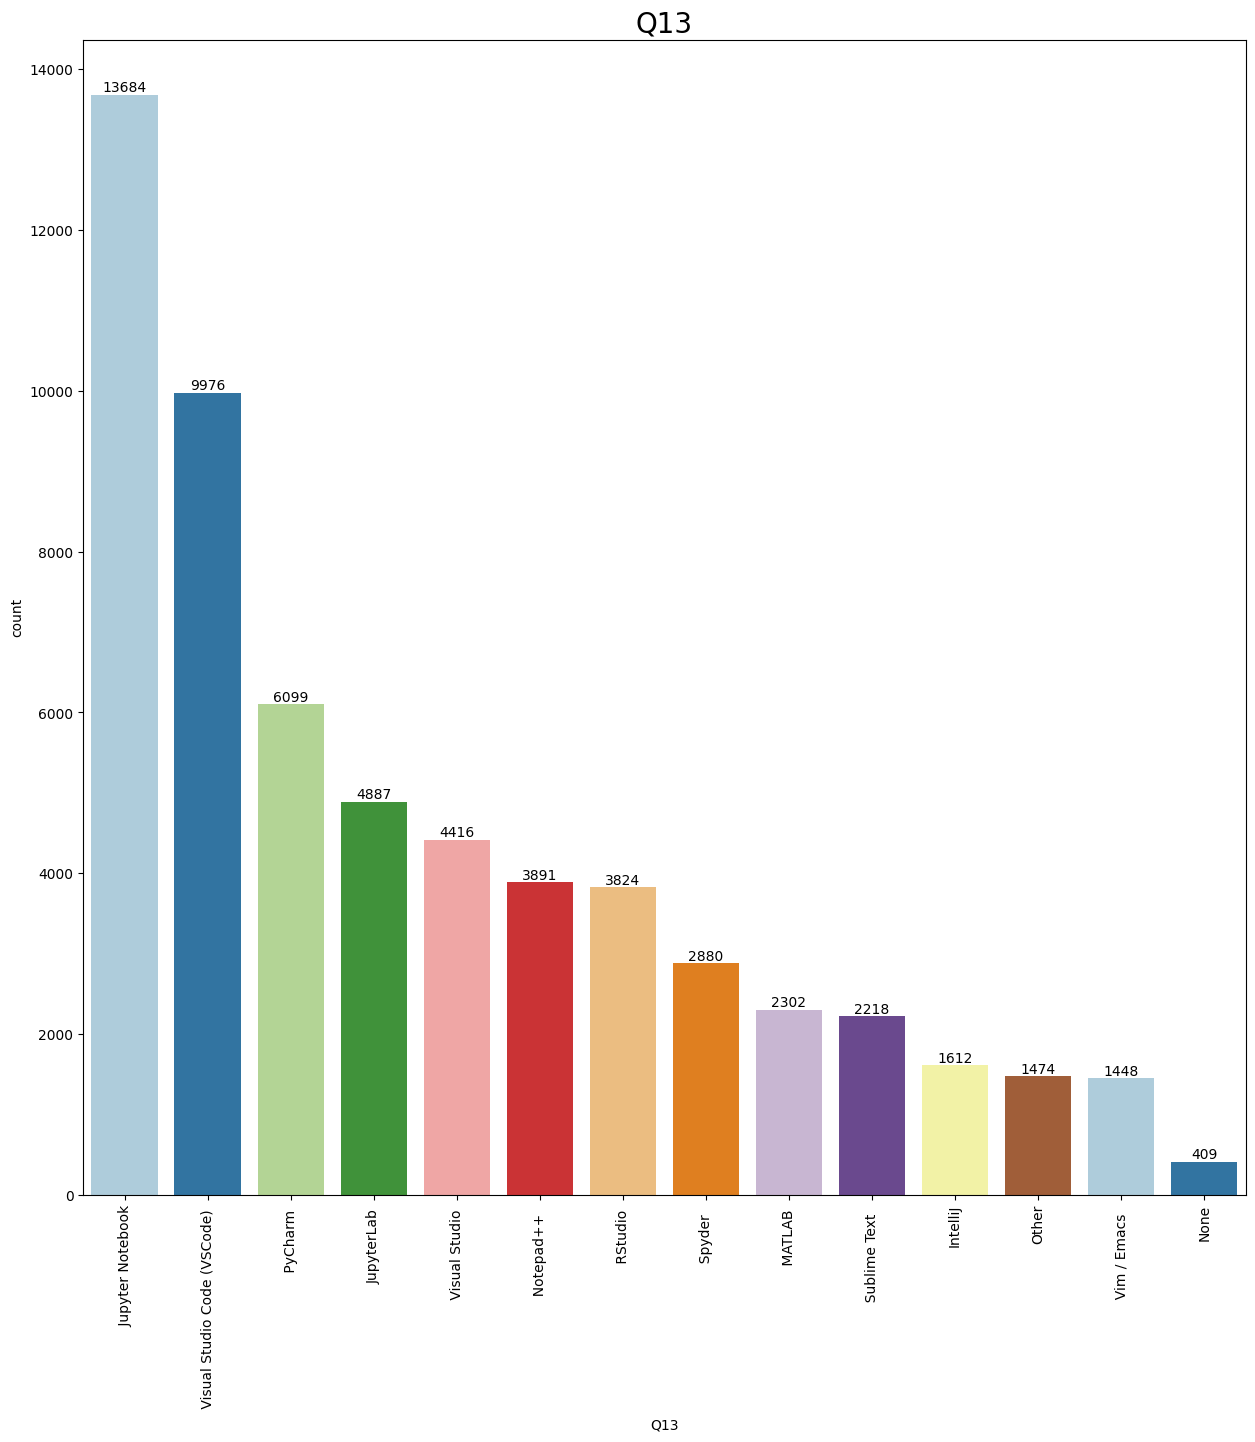

In [22]:
display_histogram(13, answers["13"])

Are you using any hosted notebook products ?

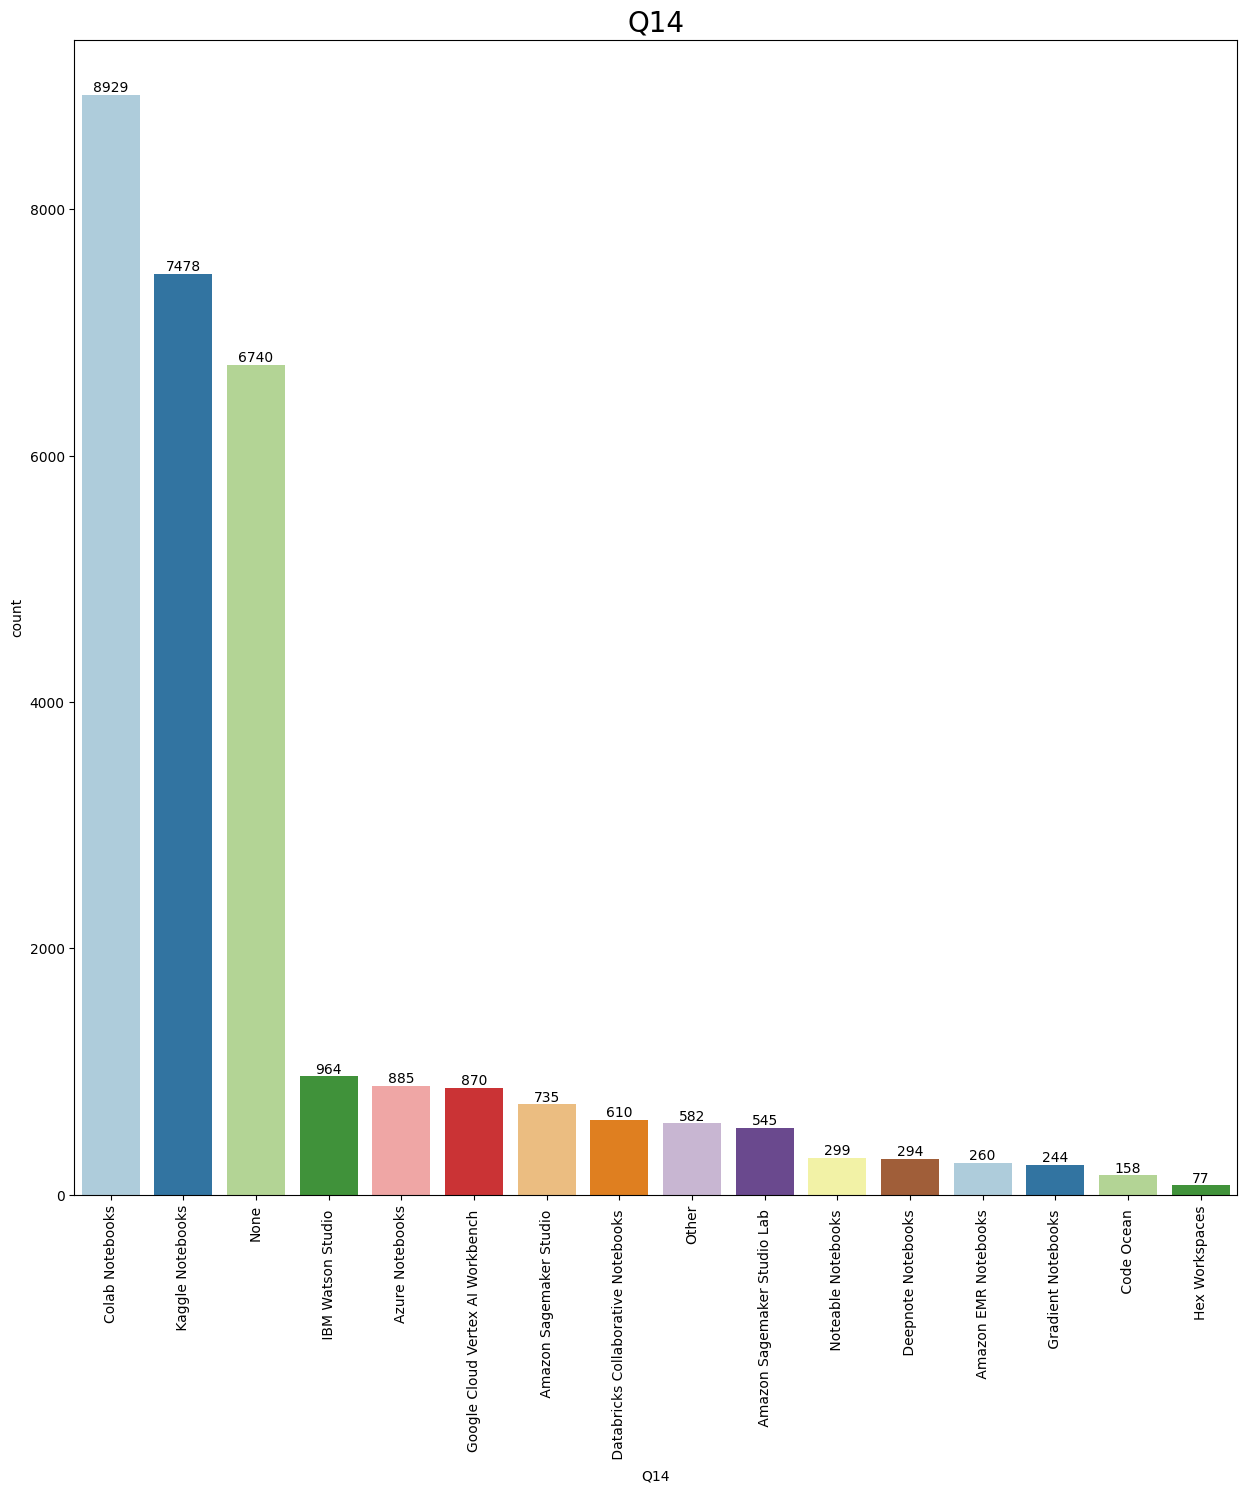

In [23]:
display_histogram(14, answers["14"])

# Popular data visualization libraries

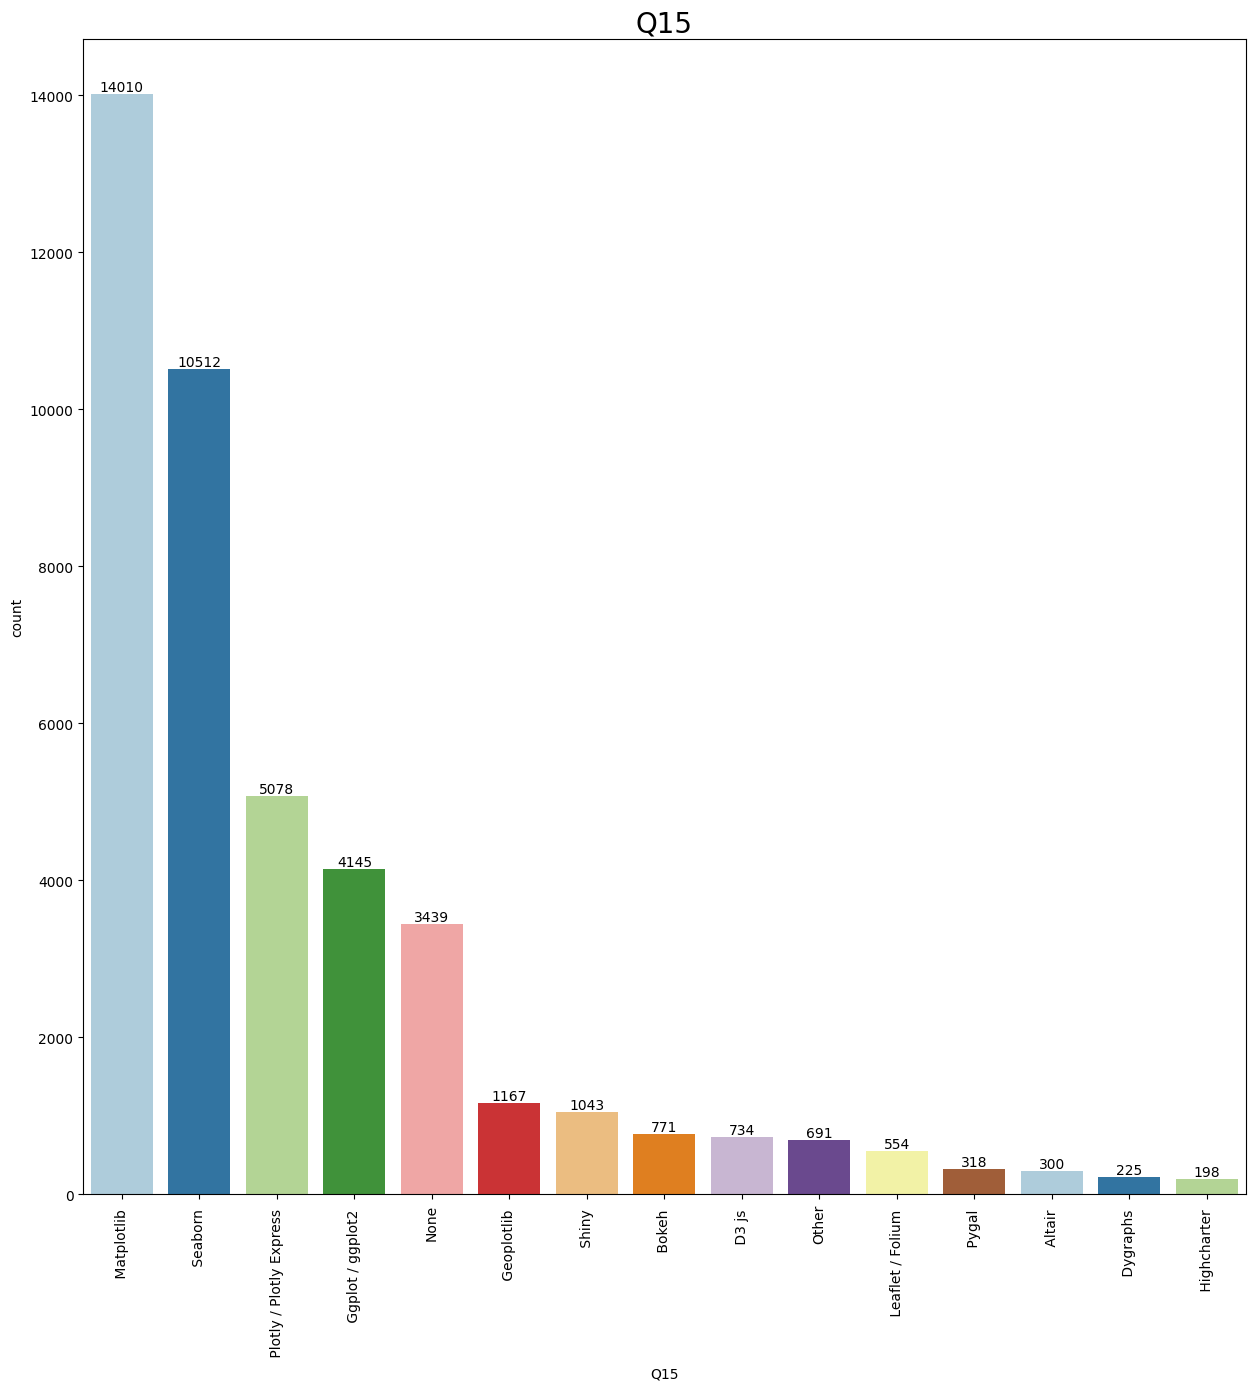

In [24]:
display_histogram(15, answers["15"])

# ML Frameworks

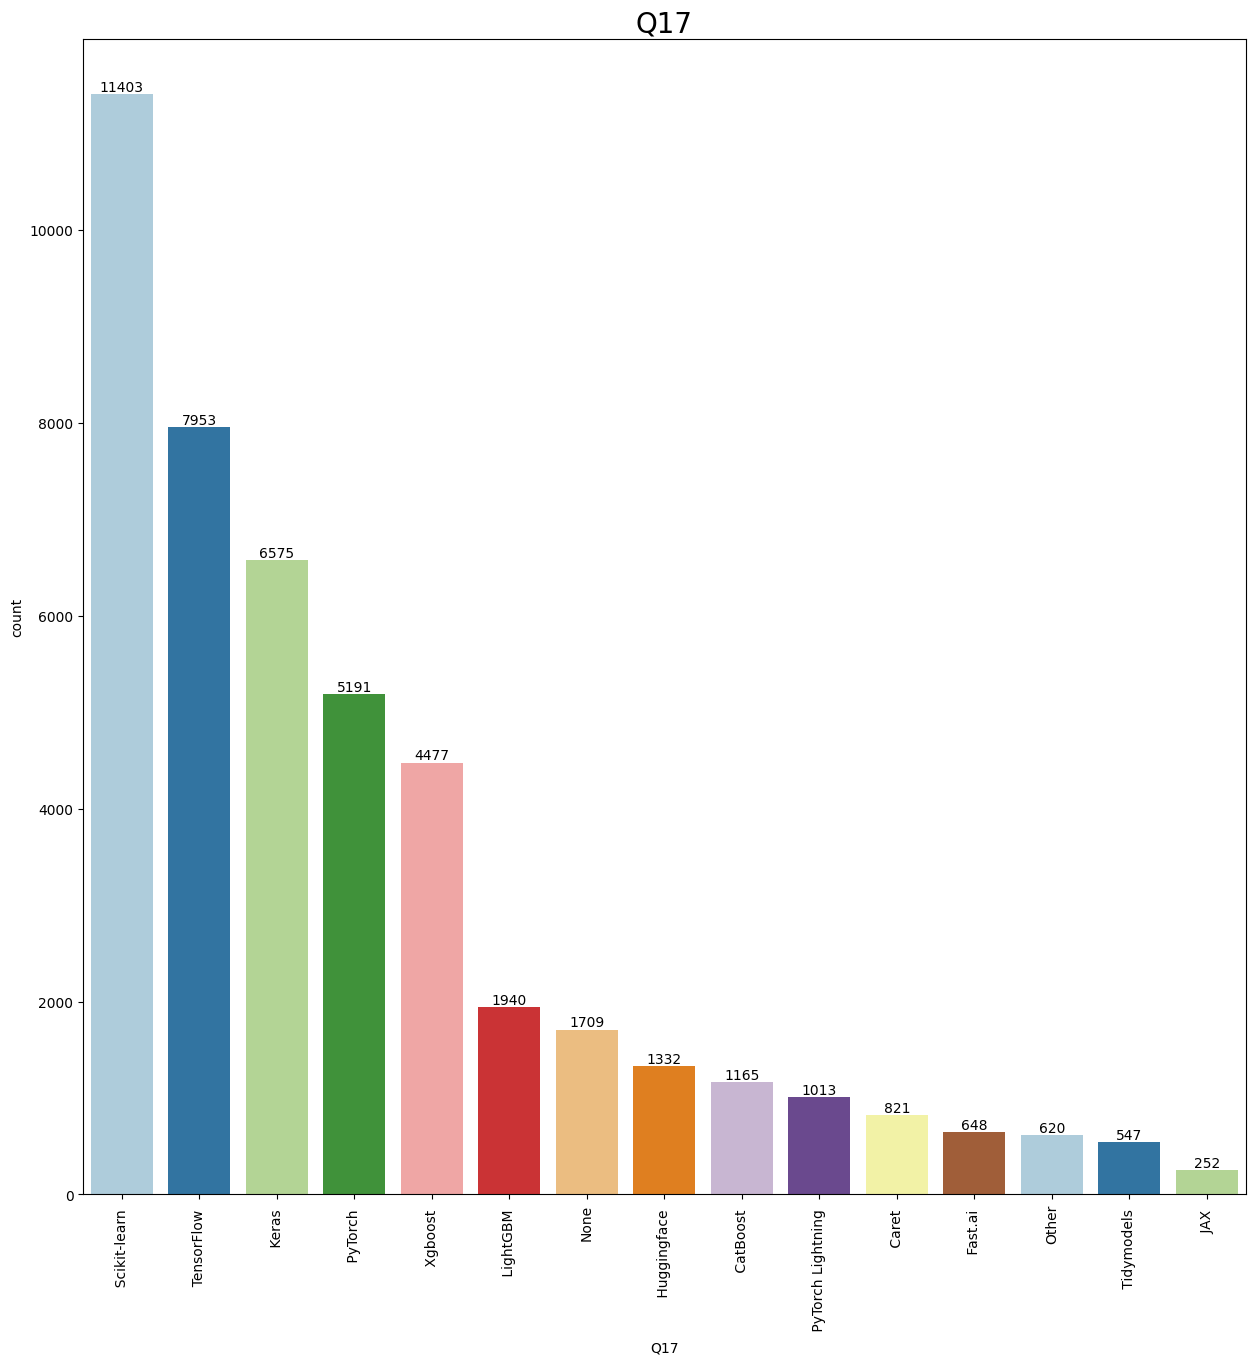

In [25]:
display_histogram(17, answers["17"])

# Let's see how many individuals are responsible for data science workloads in function of the size of the company

Text(0.5, 1.0, 'Size of company vs number of individuals responsible for data science workloads')

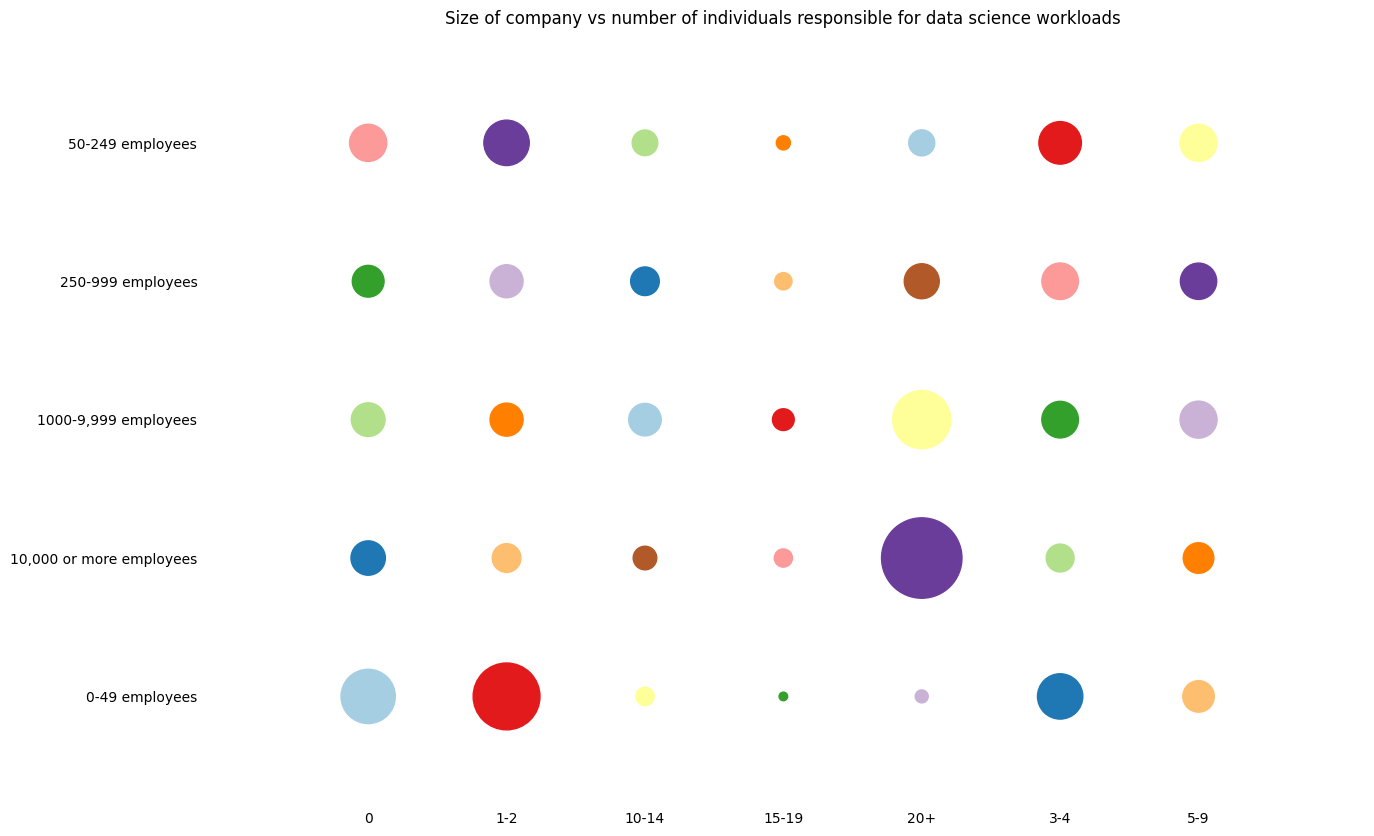

In [26]:
x = 'Q26'
y = 'Q25'

custom_palette = sns.color_palette("Paired", 35)

df_counts = df.iloc[1:].groupby([x, y]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

scale = 700*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y, size, data=df_counts, zorder=2, c=[c for c in custom_palette])
ax.tick_params(length=0)
ax.set_frame_on(False)
ax.margins(x=0.2, y=0.2)
ax.set_aspect('equal')
plt.title("Size of company vs number of individuals responsible for data science workloads")

# And how much these companies incorporate ML in their business

Text(0.5, 1.0, 'Level of ML utilization vs size of company')

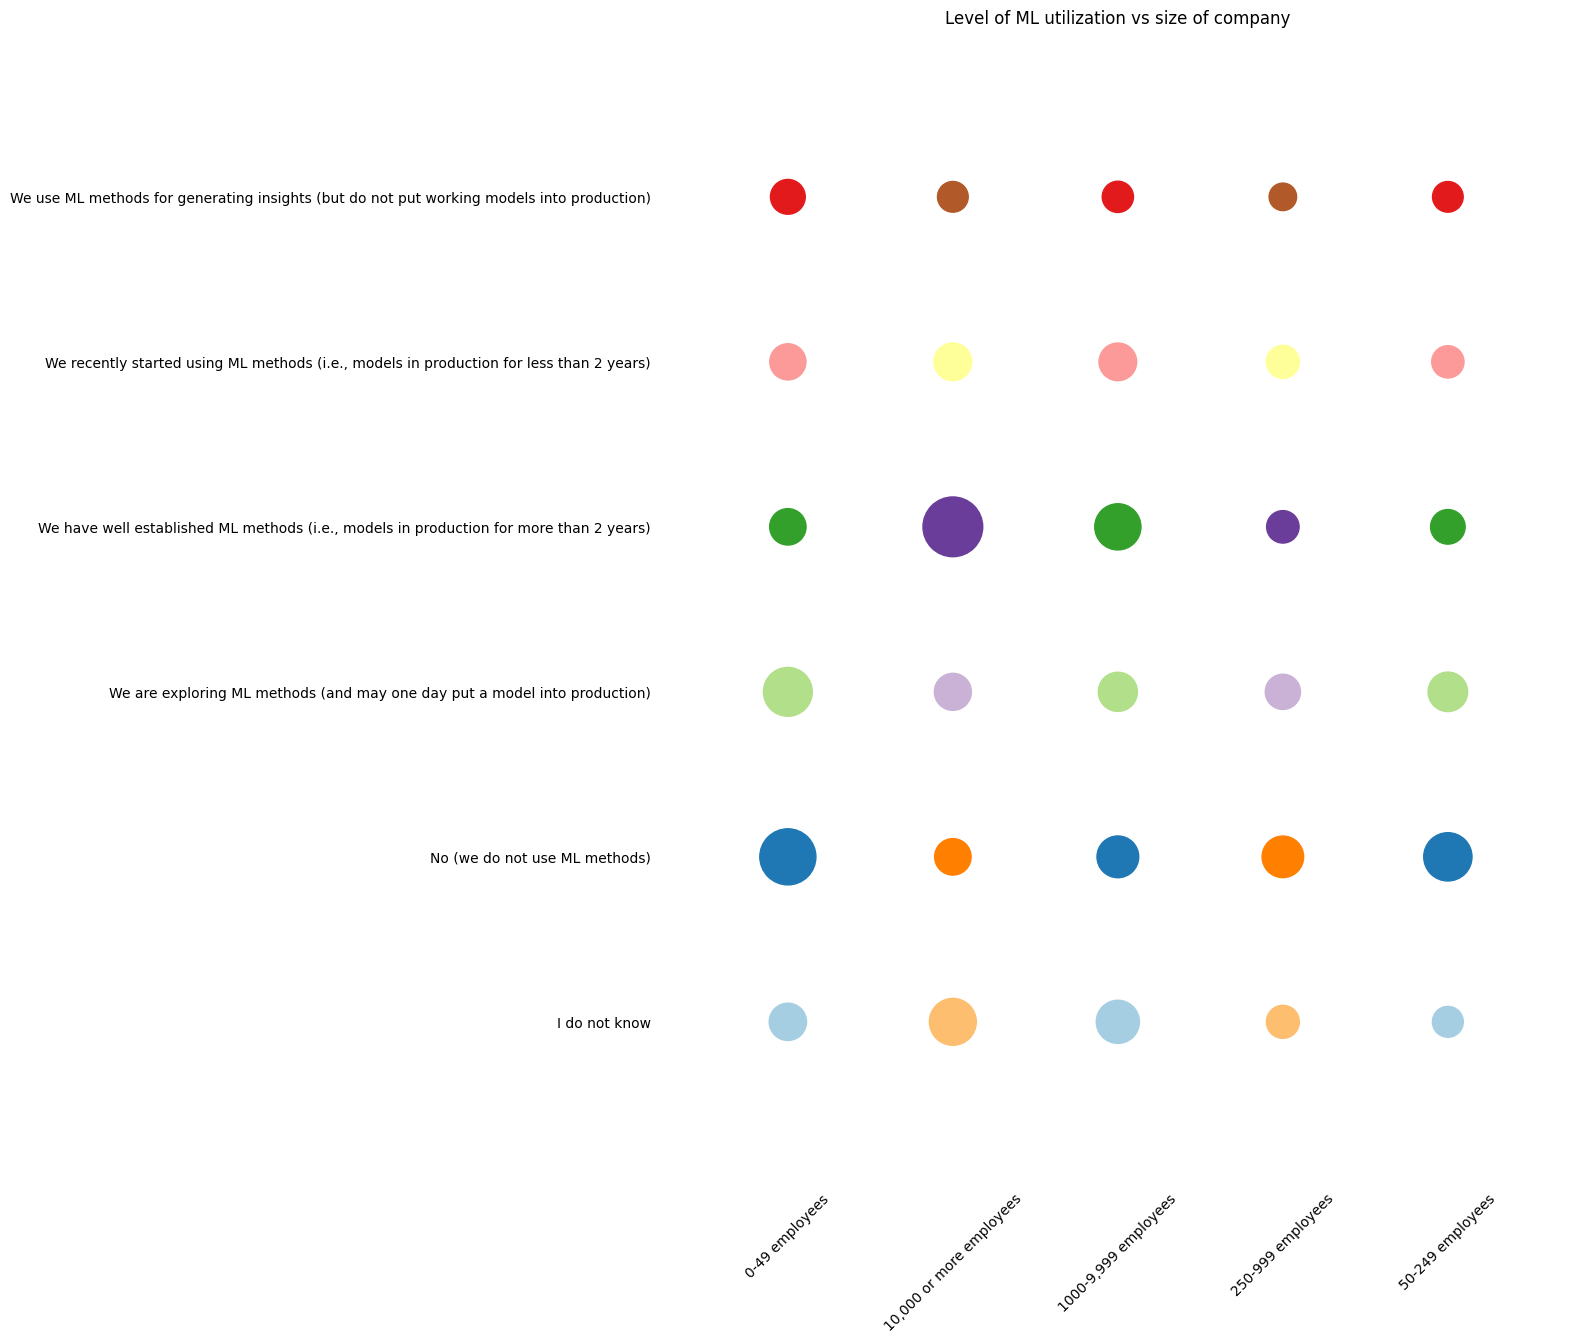

In [27]:
x = 'Q25'
y = 'Q27'

custom_palette = sns.color_palette("Paired", 30)

df_counts = df.iloc[1:].groupby([x, y]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

scale = 800*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x, y, size, data=df_counts, zorder=2, c=[c for c in custom_palette])
ax.tick_params(length=0)
ax.set_frame_on(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.margins(x=0.2, y=0.2)
ax.set_aspect('equal')
plt.title("Level of ML utilization vs size of company")

# Let's visualize how much ML is used in differents industries

Text(0.5, 1.0, 'Level of ML utilization vs industry')

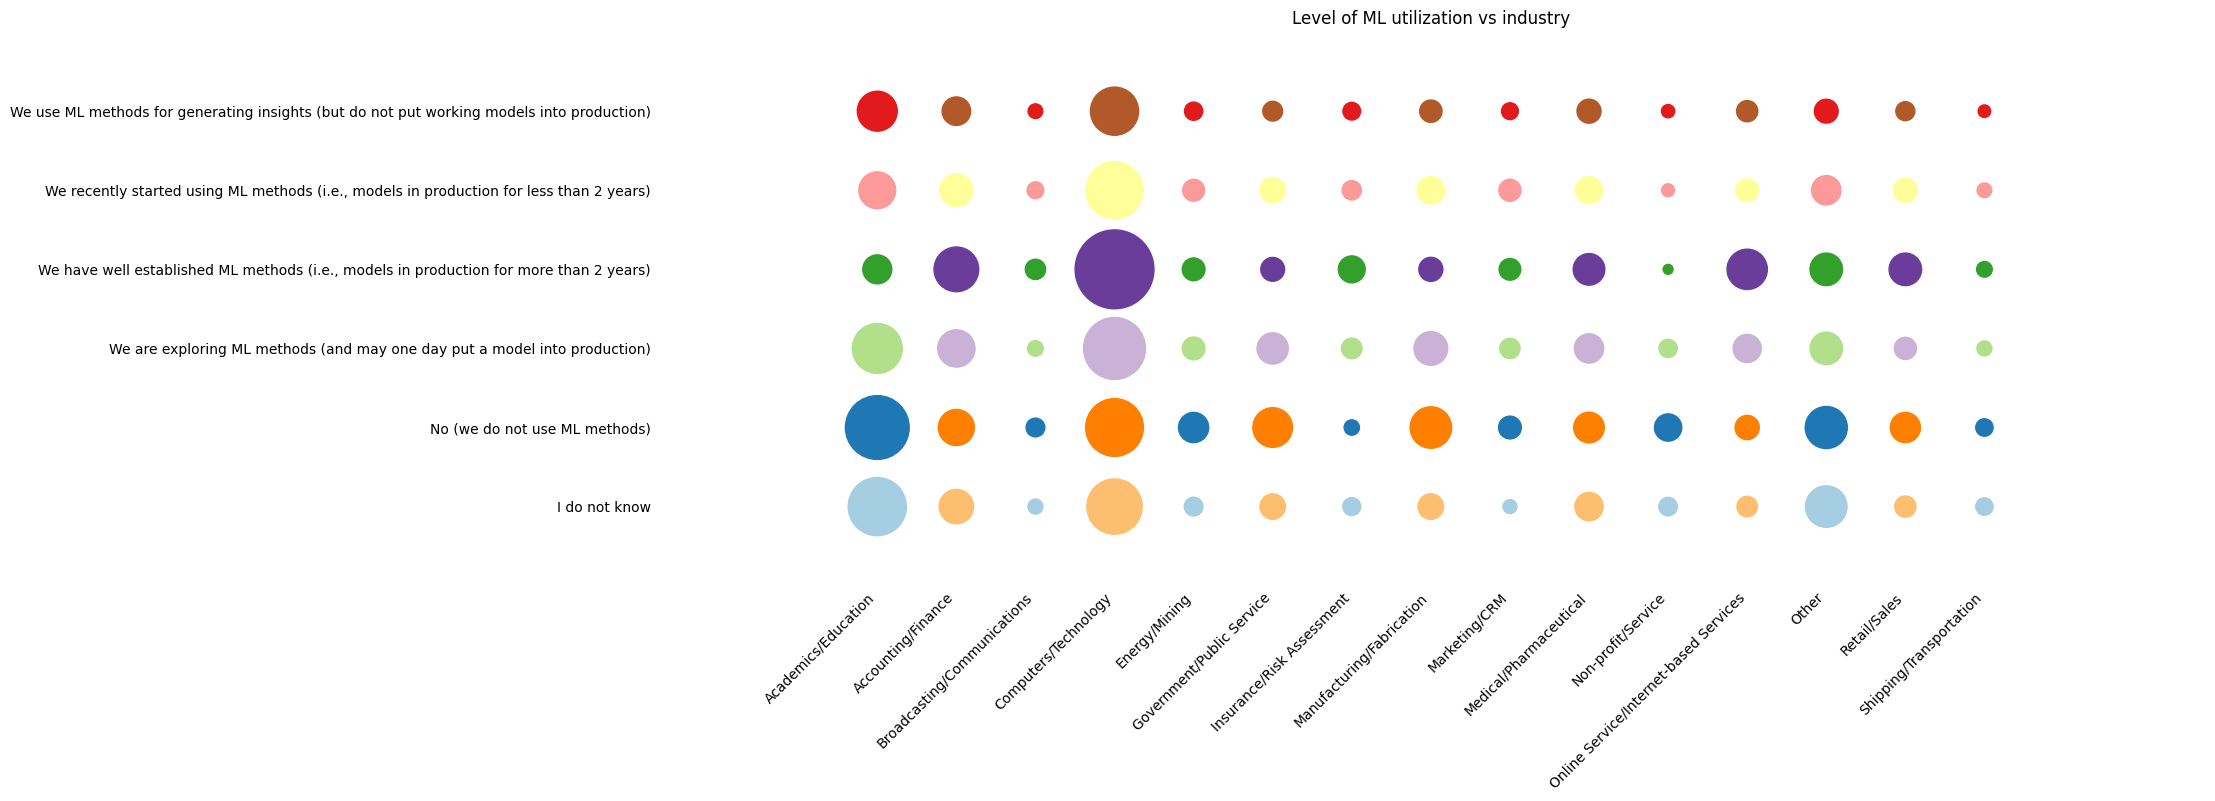

In [28]:
x = 'Q24'
y = 'Q27'

custom_palette = sns.color_palette("Paired", 90)

df_counts = df.iloc[1:].groupby([x, y]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

scale = 500*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y, size, data=df_counts, c=[c for c in custom_palette])
ax.tick_params(length=0)
plt.xticks(rotation=45, ha='right')
ax.set_frame_on(False)
ax.margins(x=0.2, y=0.2)
ax.set_aspect('equal')
plt.title("Level of ML utilization vs industry")

 **It is very interesting in Medical/Pharmaceutical there is a small percentage of ML used. We can say the same for Shipping/Transporation. Obviously for Computers/Technology we have a higher percentage.**

# What if we looked at the title of participants and their respective salaries ?

In [29]:
import plotly.express as px

df_group = df.groupby(['Q23', 'Q29']).size().reset_index(name='counts')

fig = px.sunburst(df_group, path=['Q23', 'Q29'], values=df_group['counts'])
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0)
)
fig.show()

# Let's see what kind of work it is done by data science related jobs

In [30]:
filter_col = [col for col in df if col.startswith('Q28')]
list_df = []
for answer in filter_col:
    globals()[f"df_{answer}"] = pd.DataFrame()
    globals()[f"df_{answer}"] = df.iloc[1:].groupby(["Q23", answer]).size().reset_index(name='counts')
    list_df.append(f"df_{answer}")

In [31]:
df_concat = df_Q28_1
for df in list_df[1:]:
    df = globals()[df]
    df_concat = pd.concat([df_concat, df.iloc[:,1:]], axis=1)

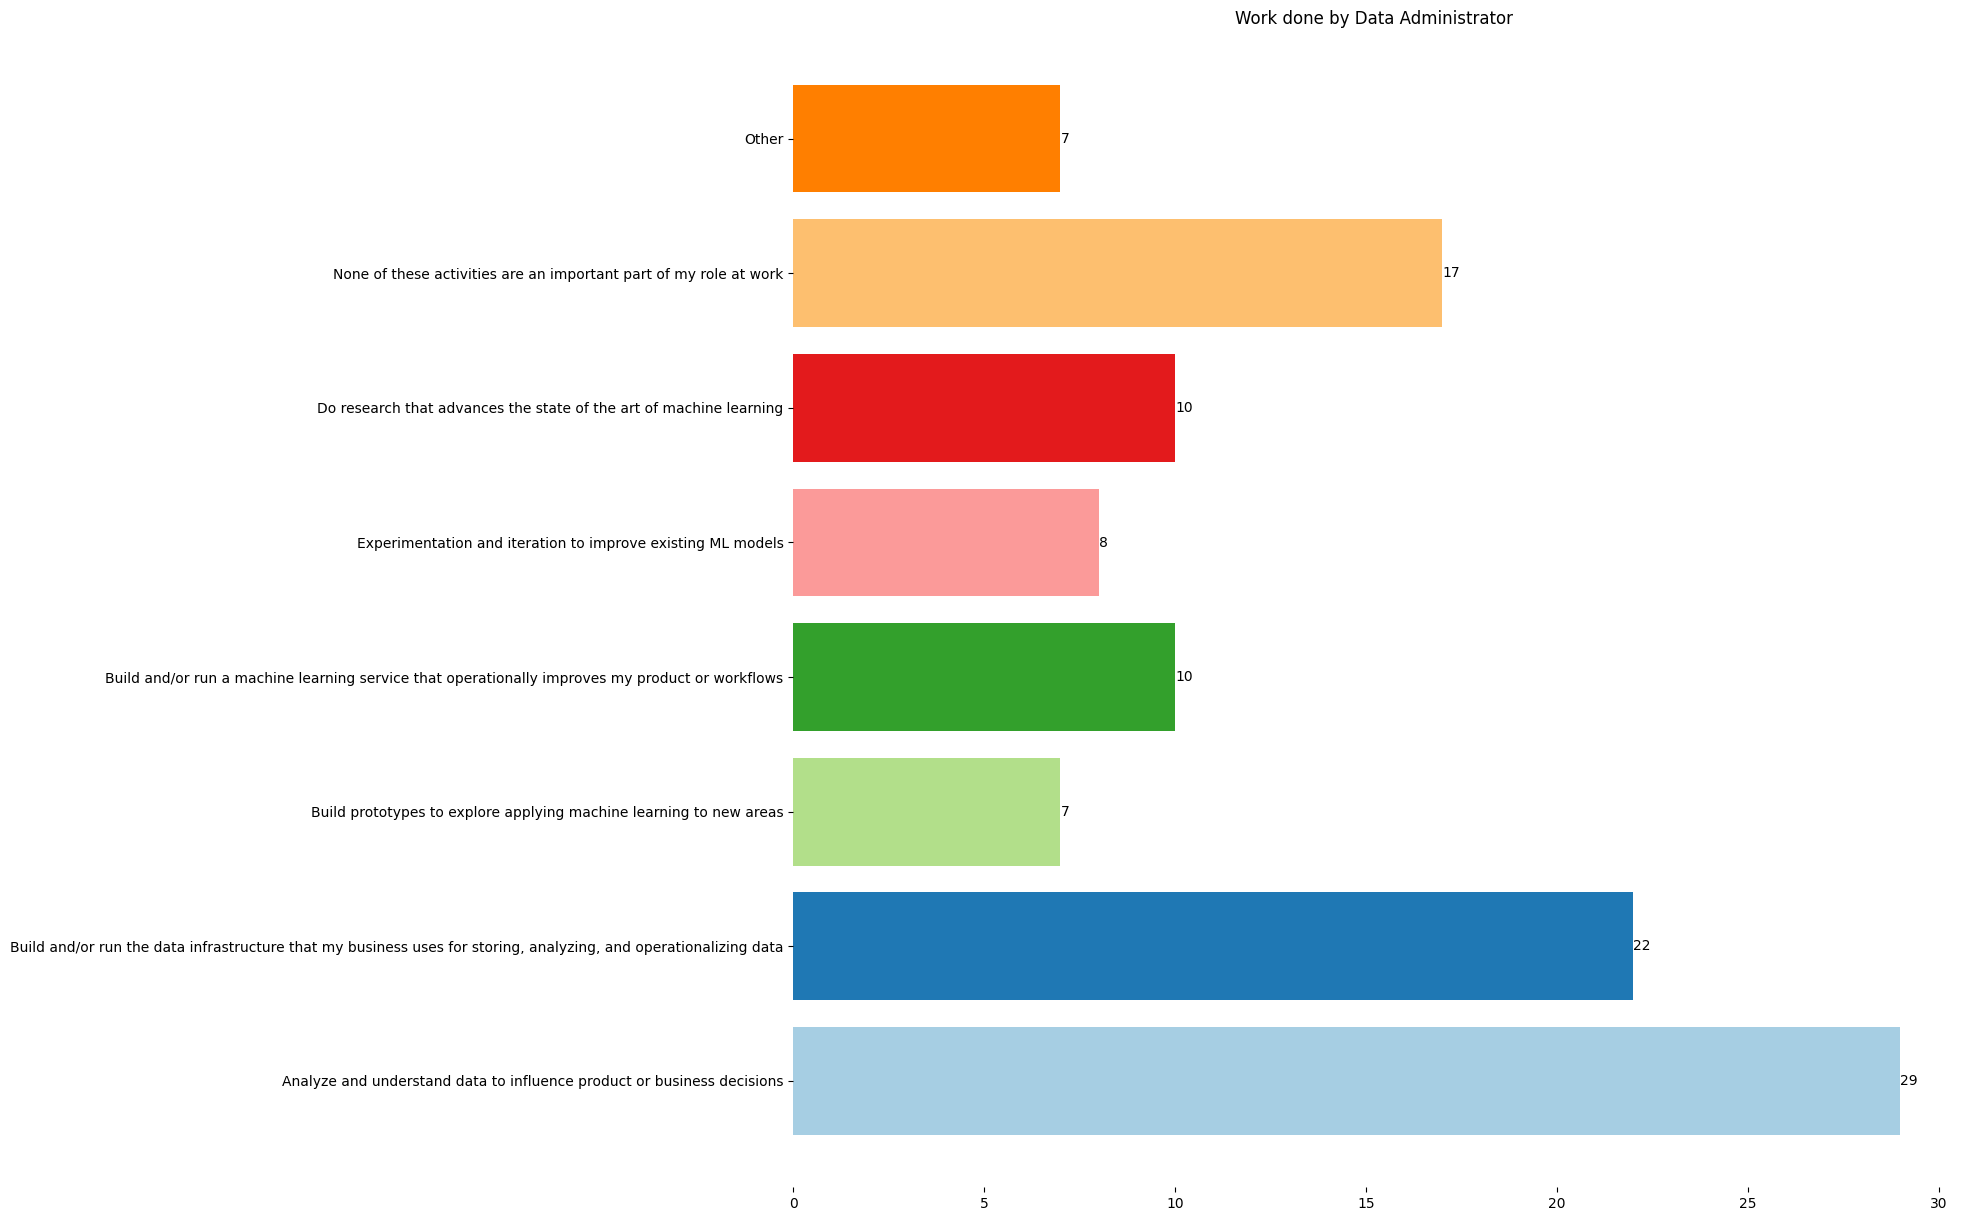

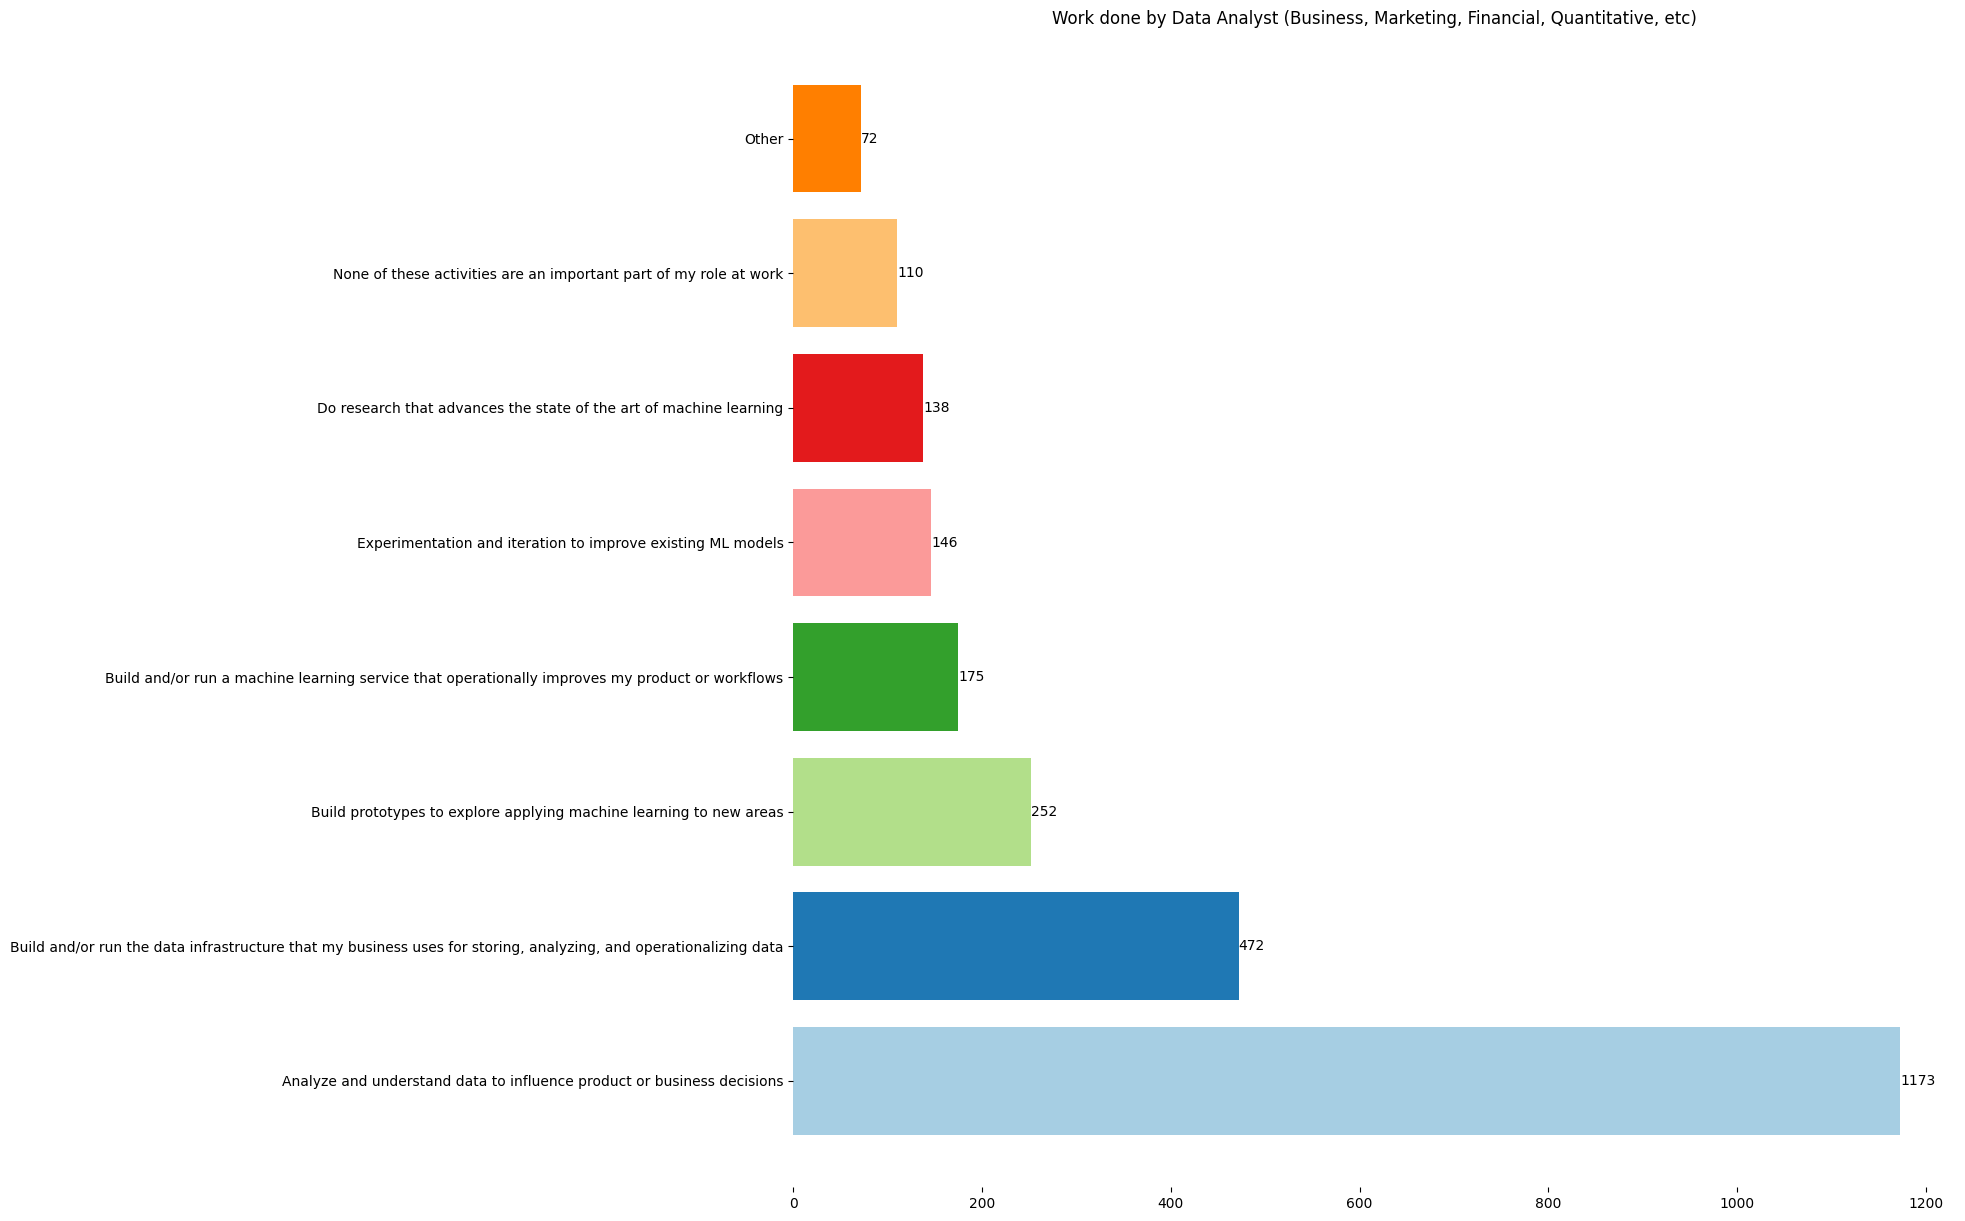

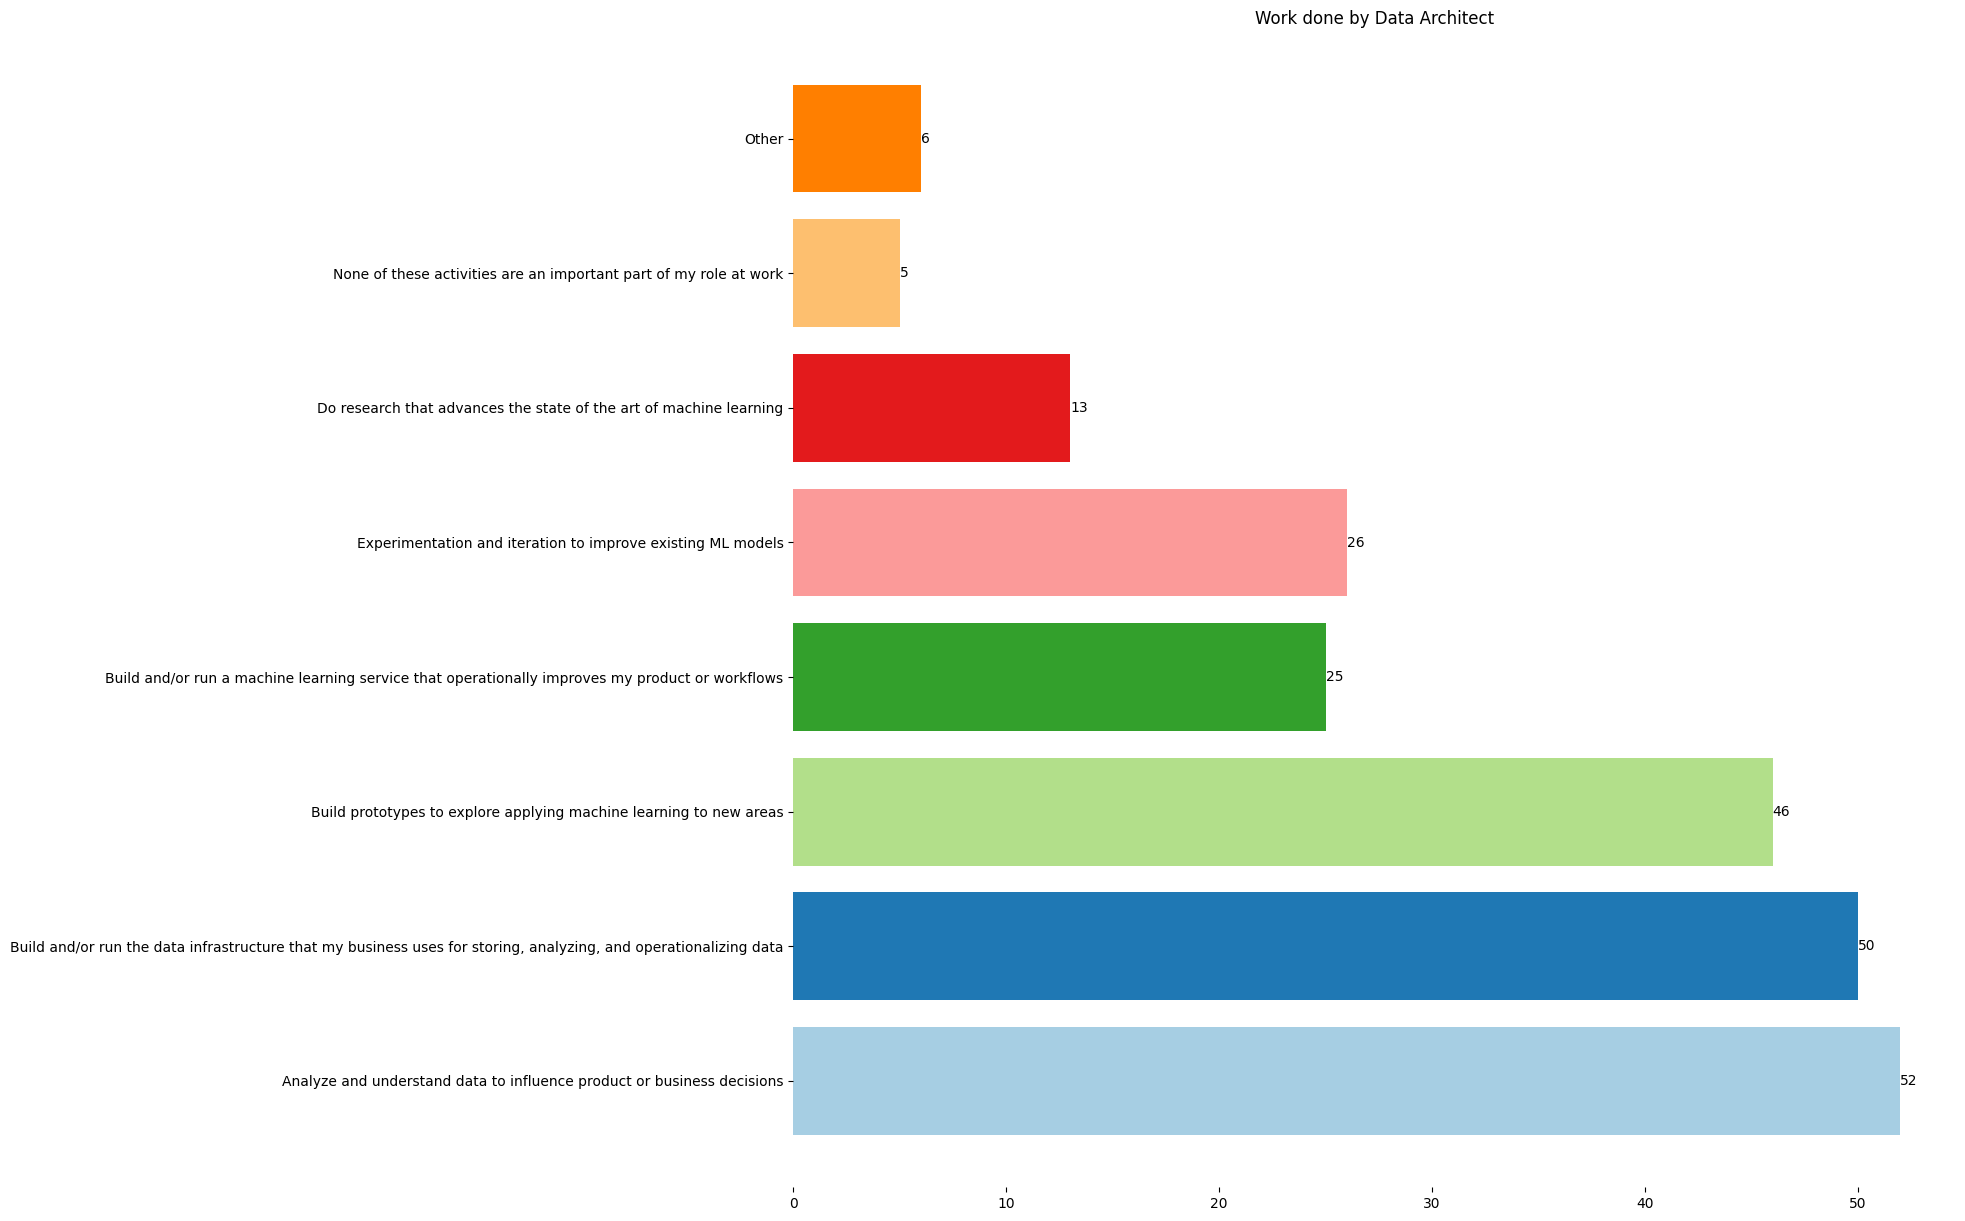

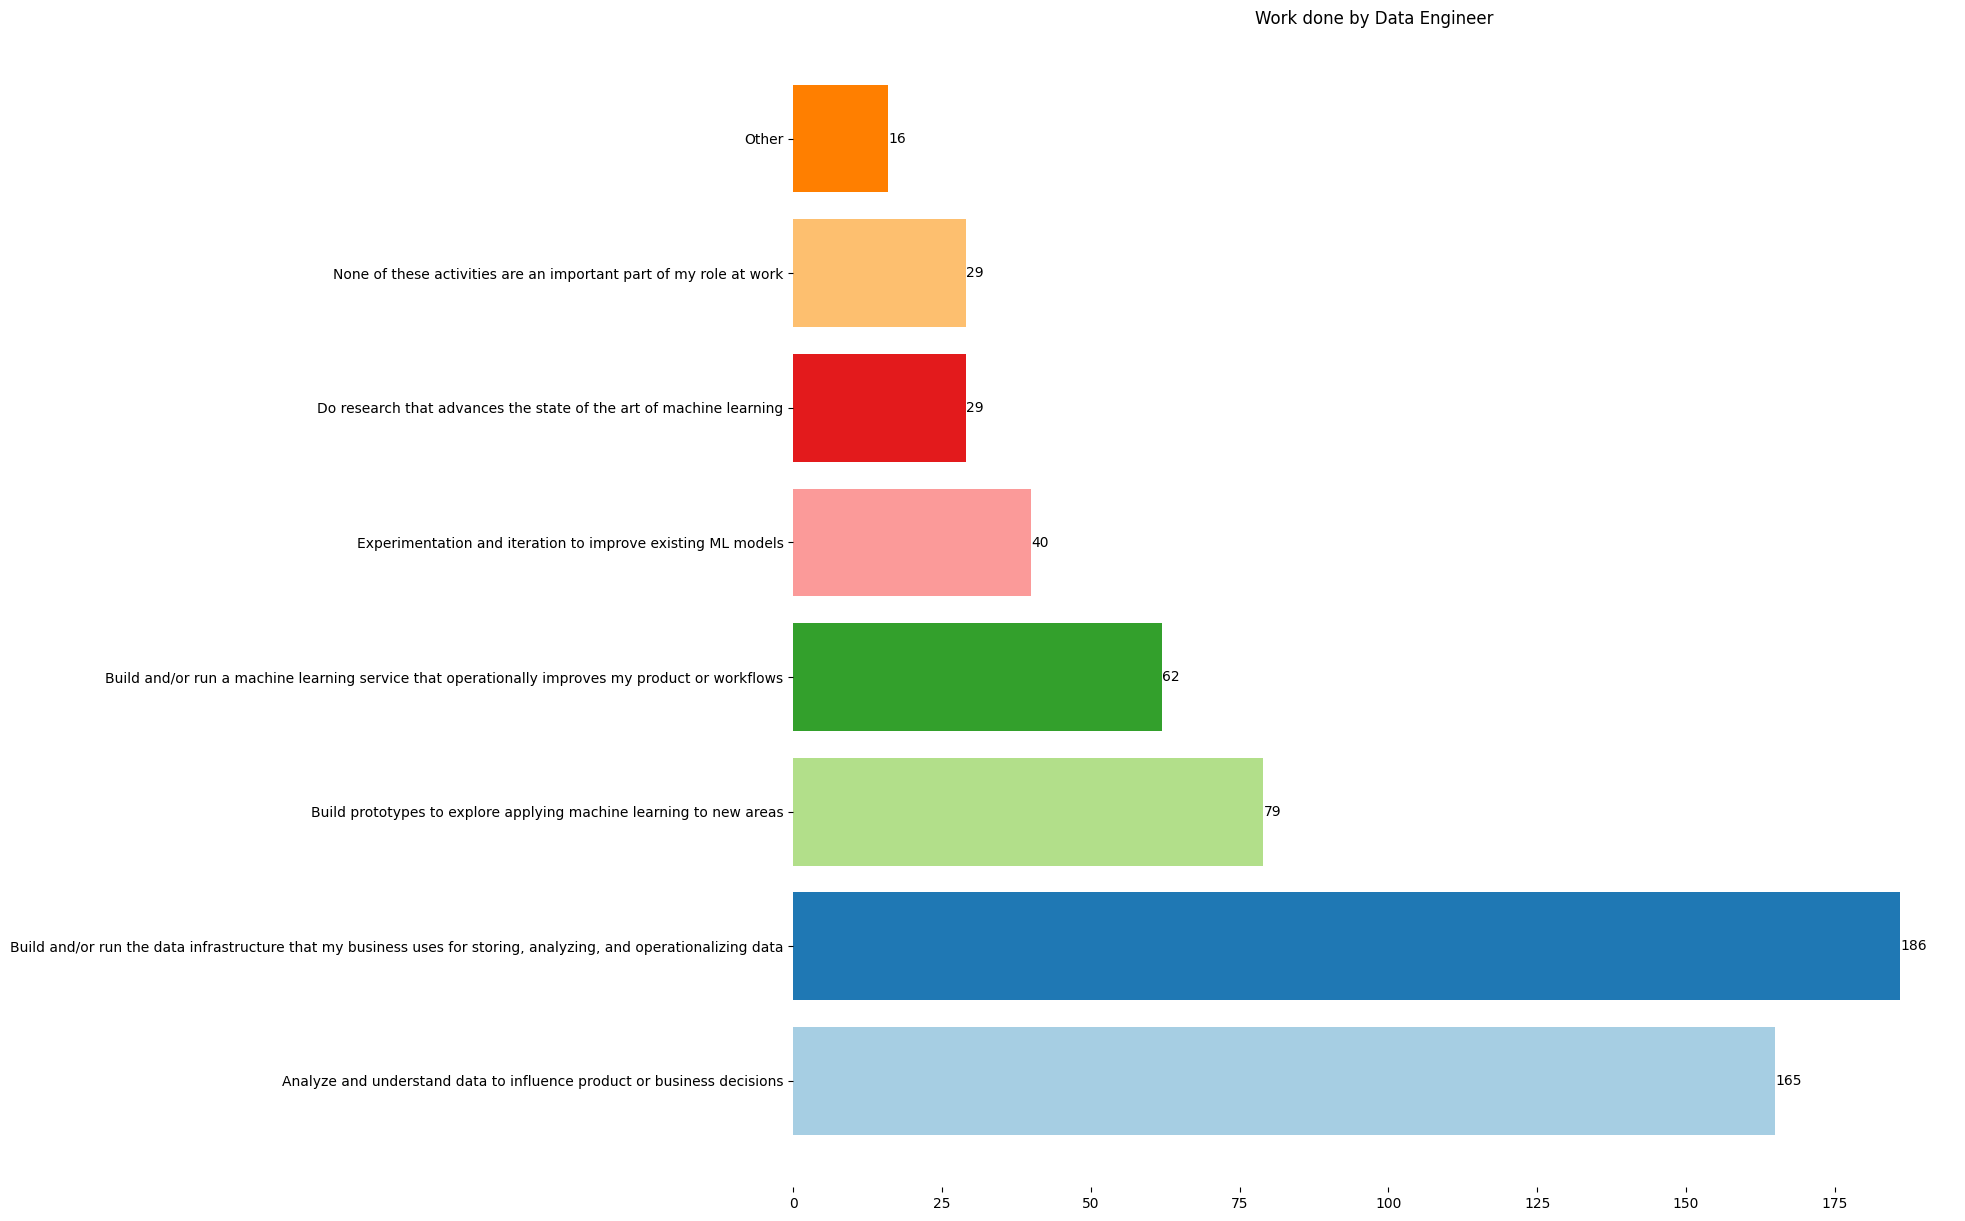

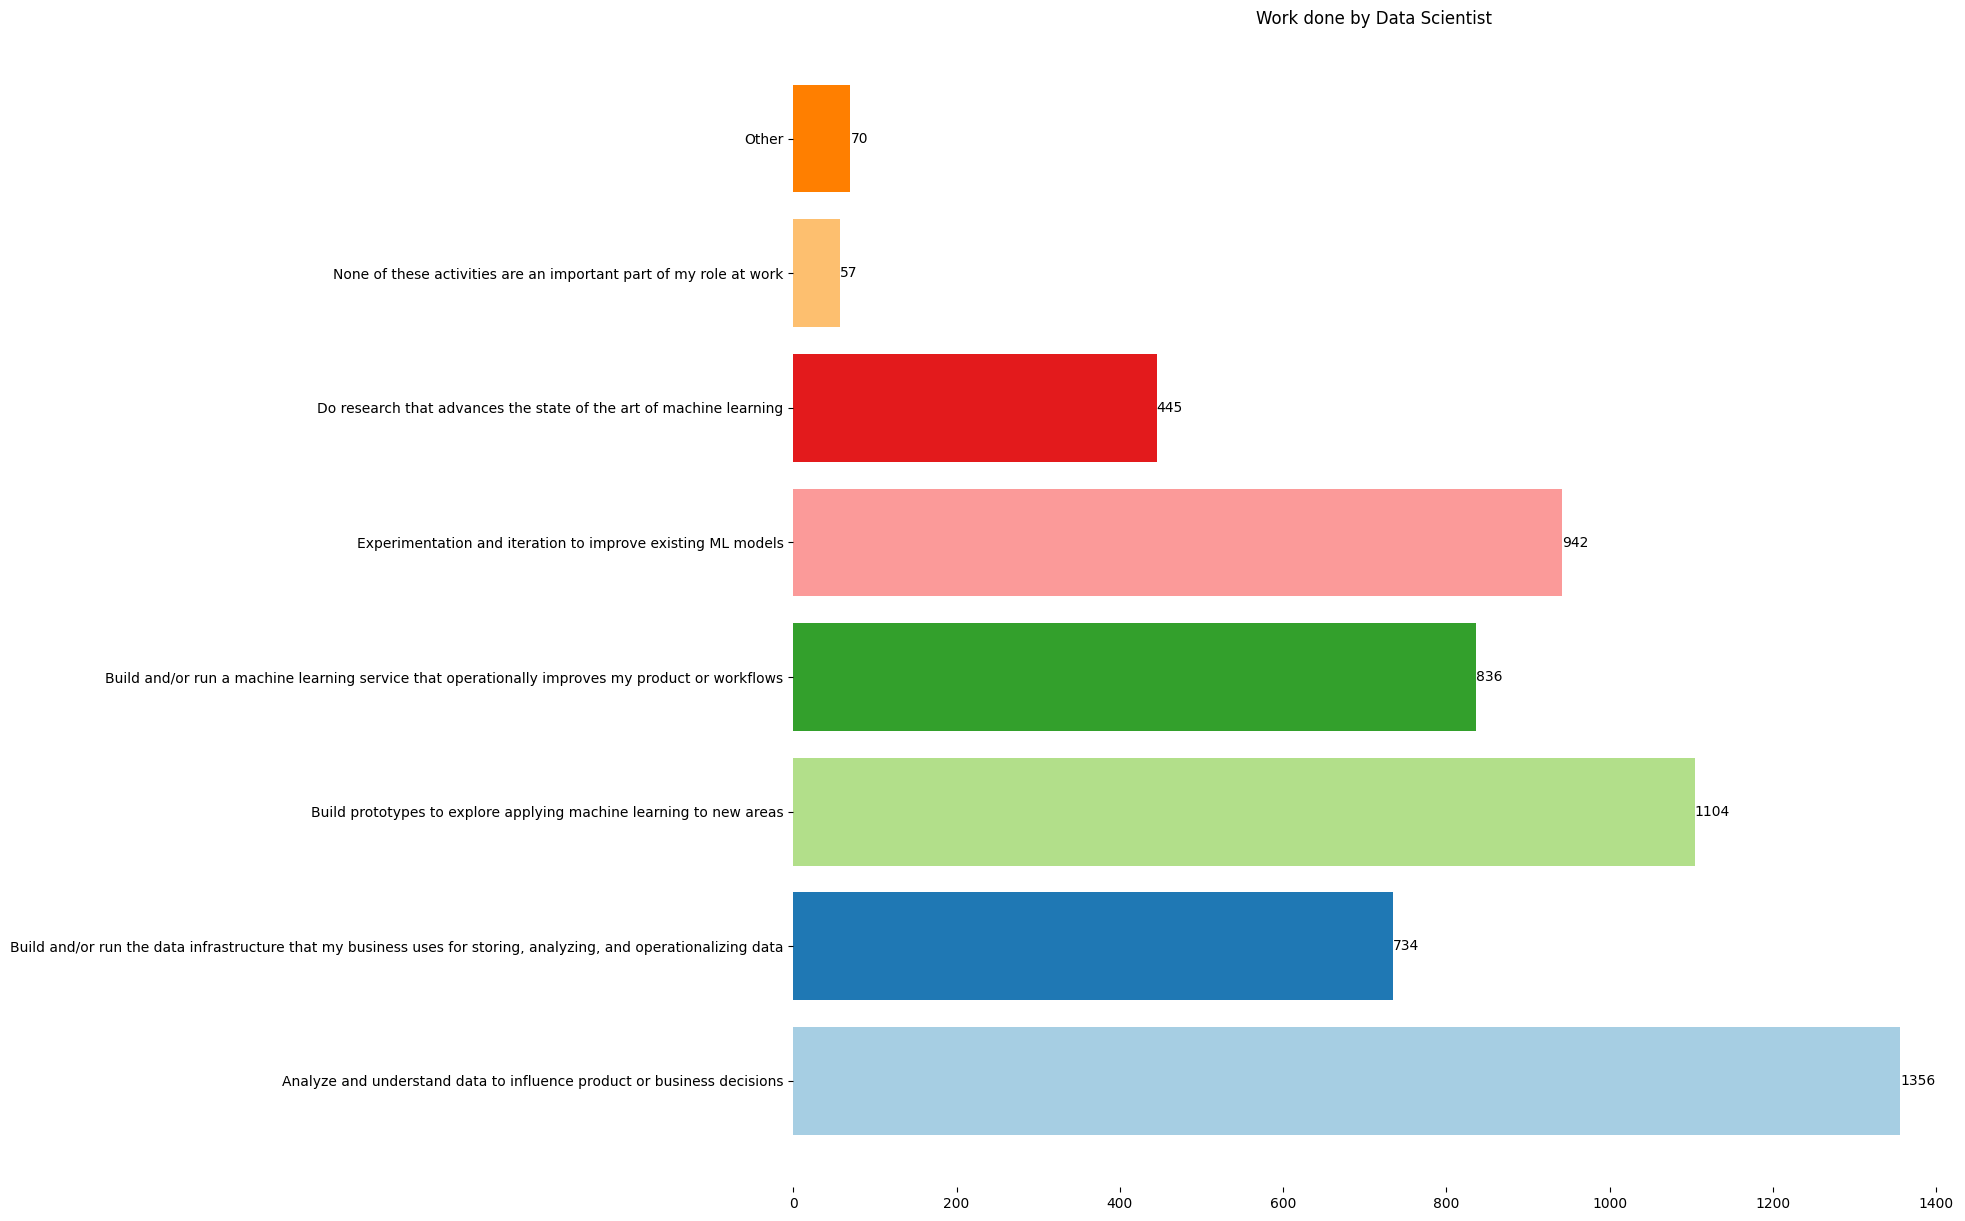

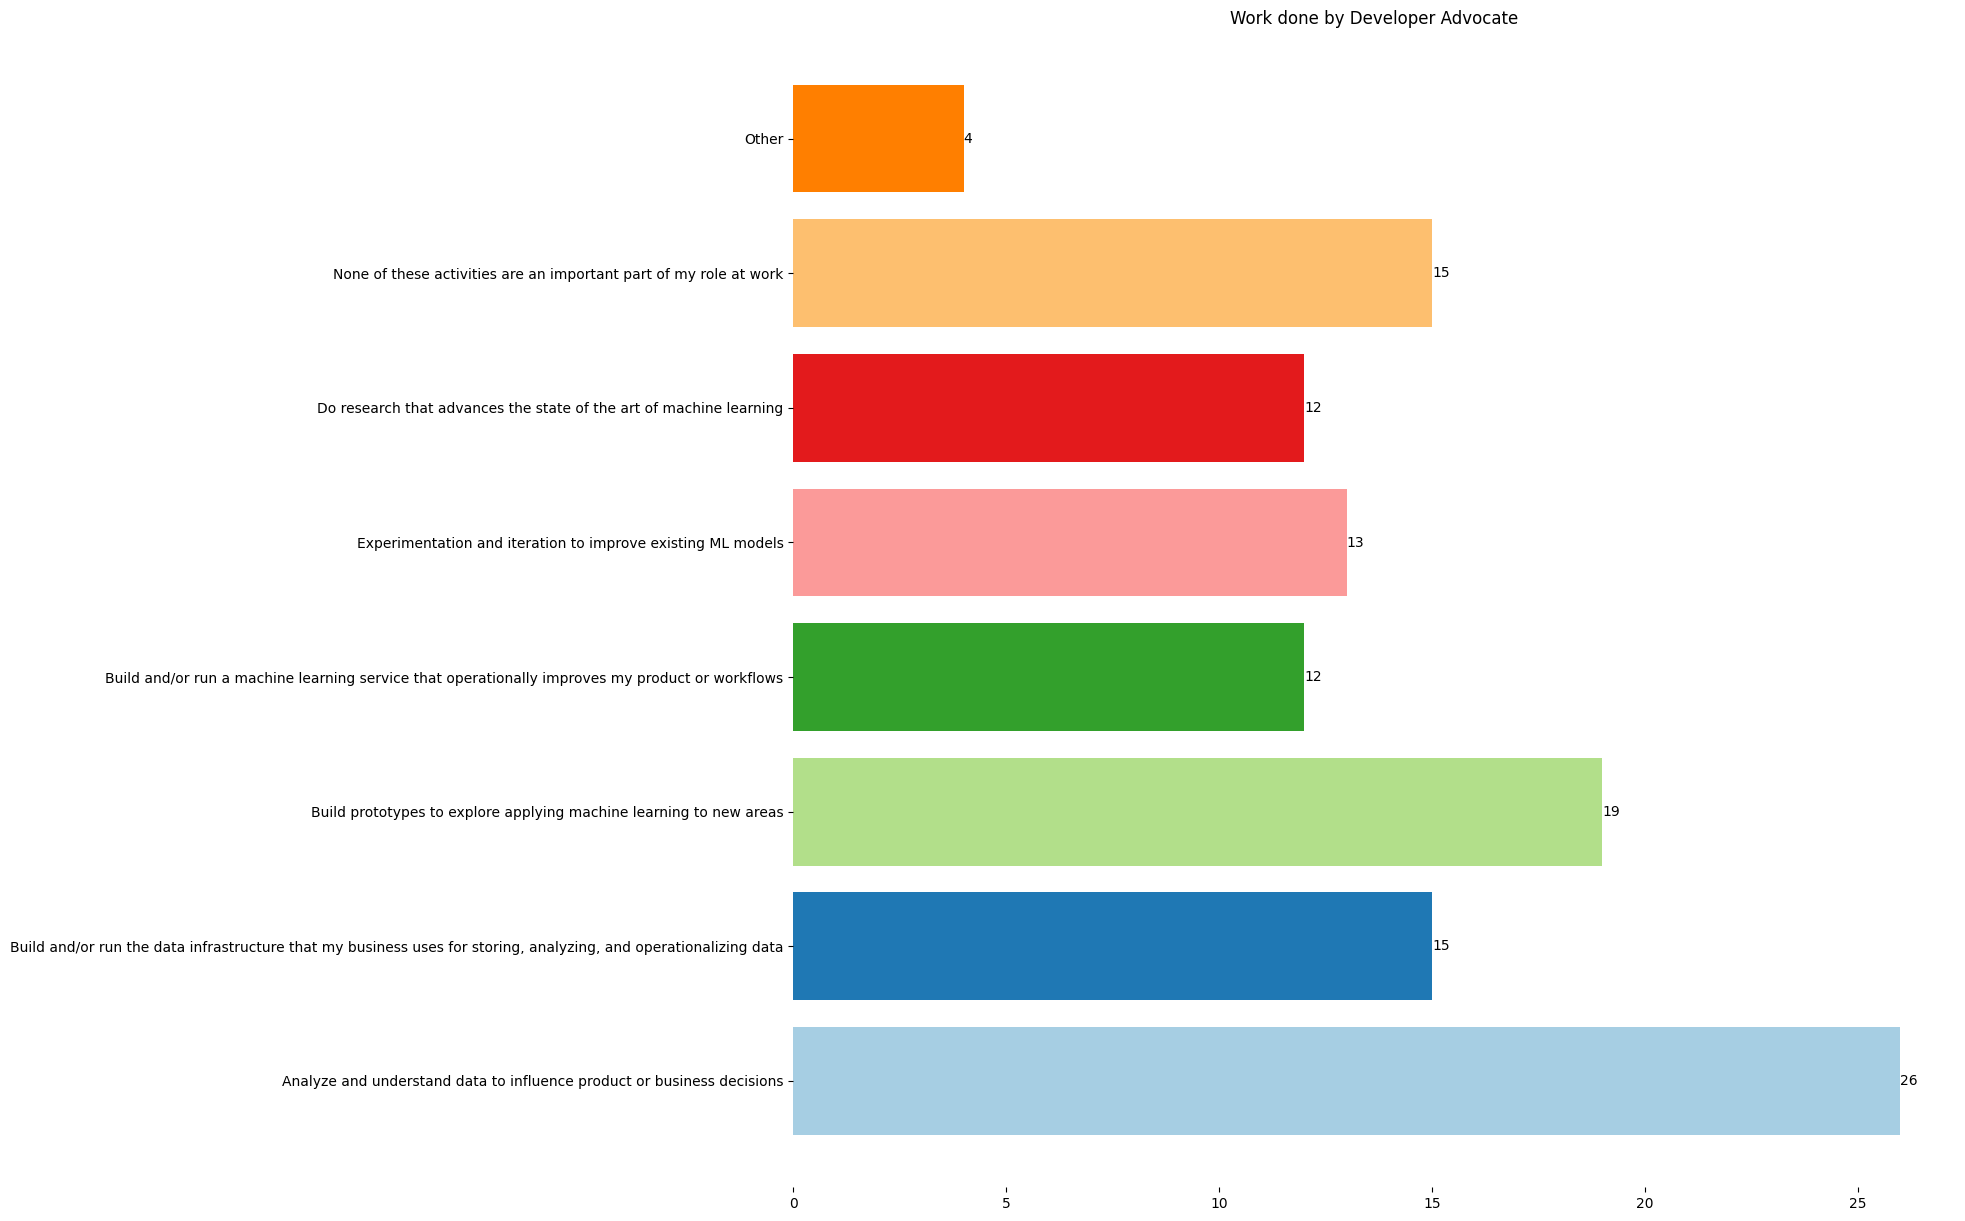

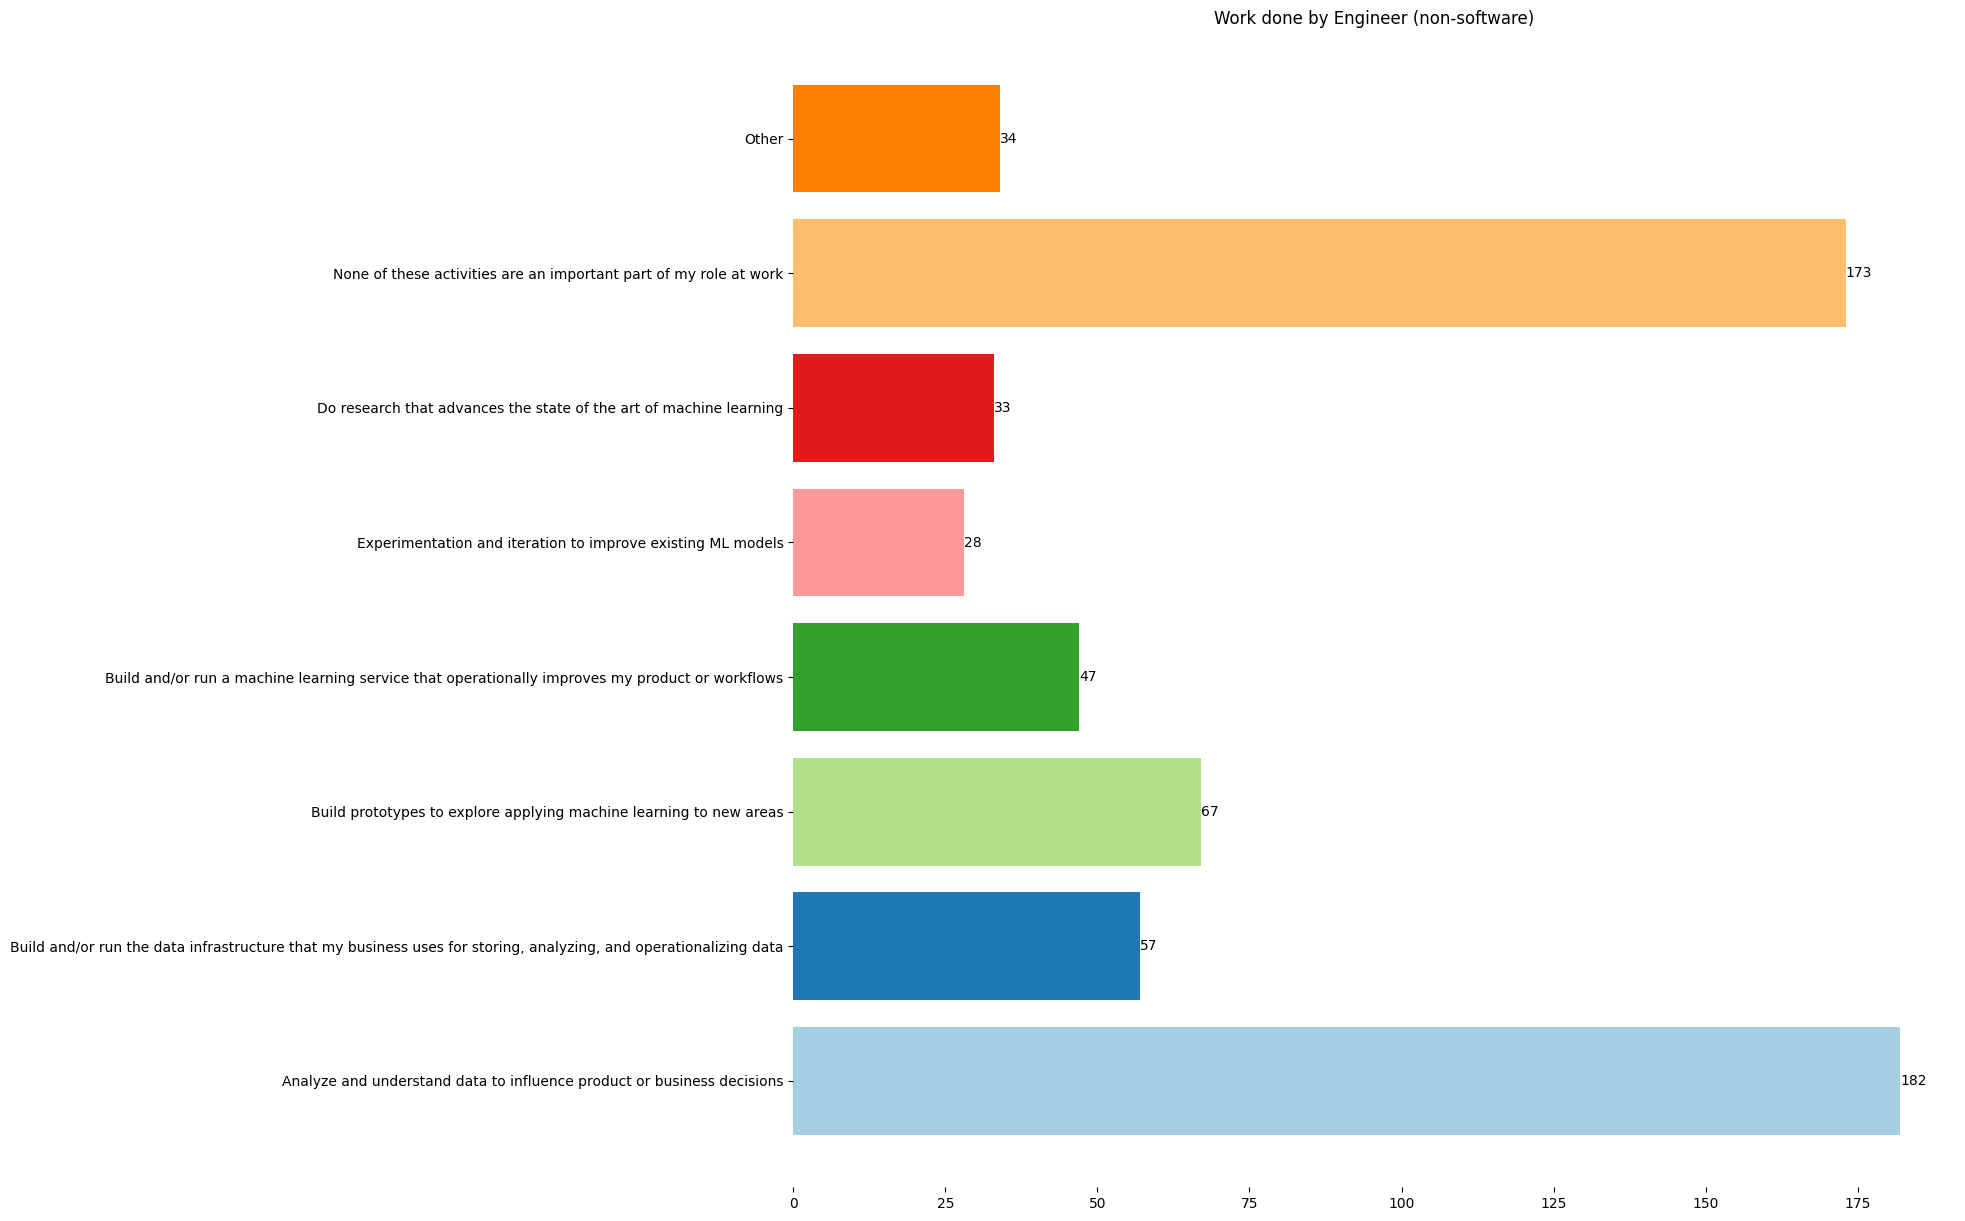

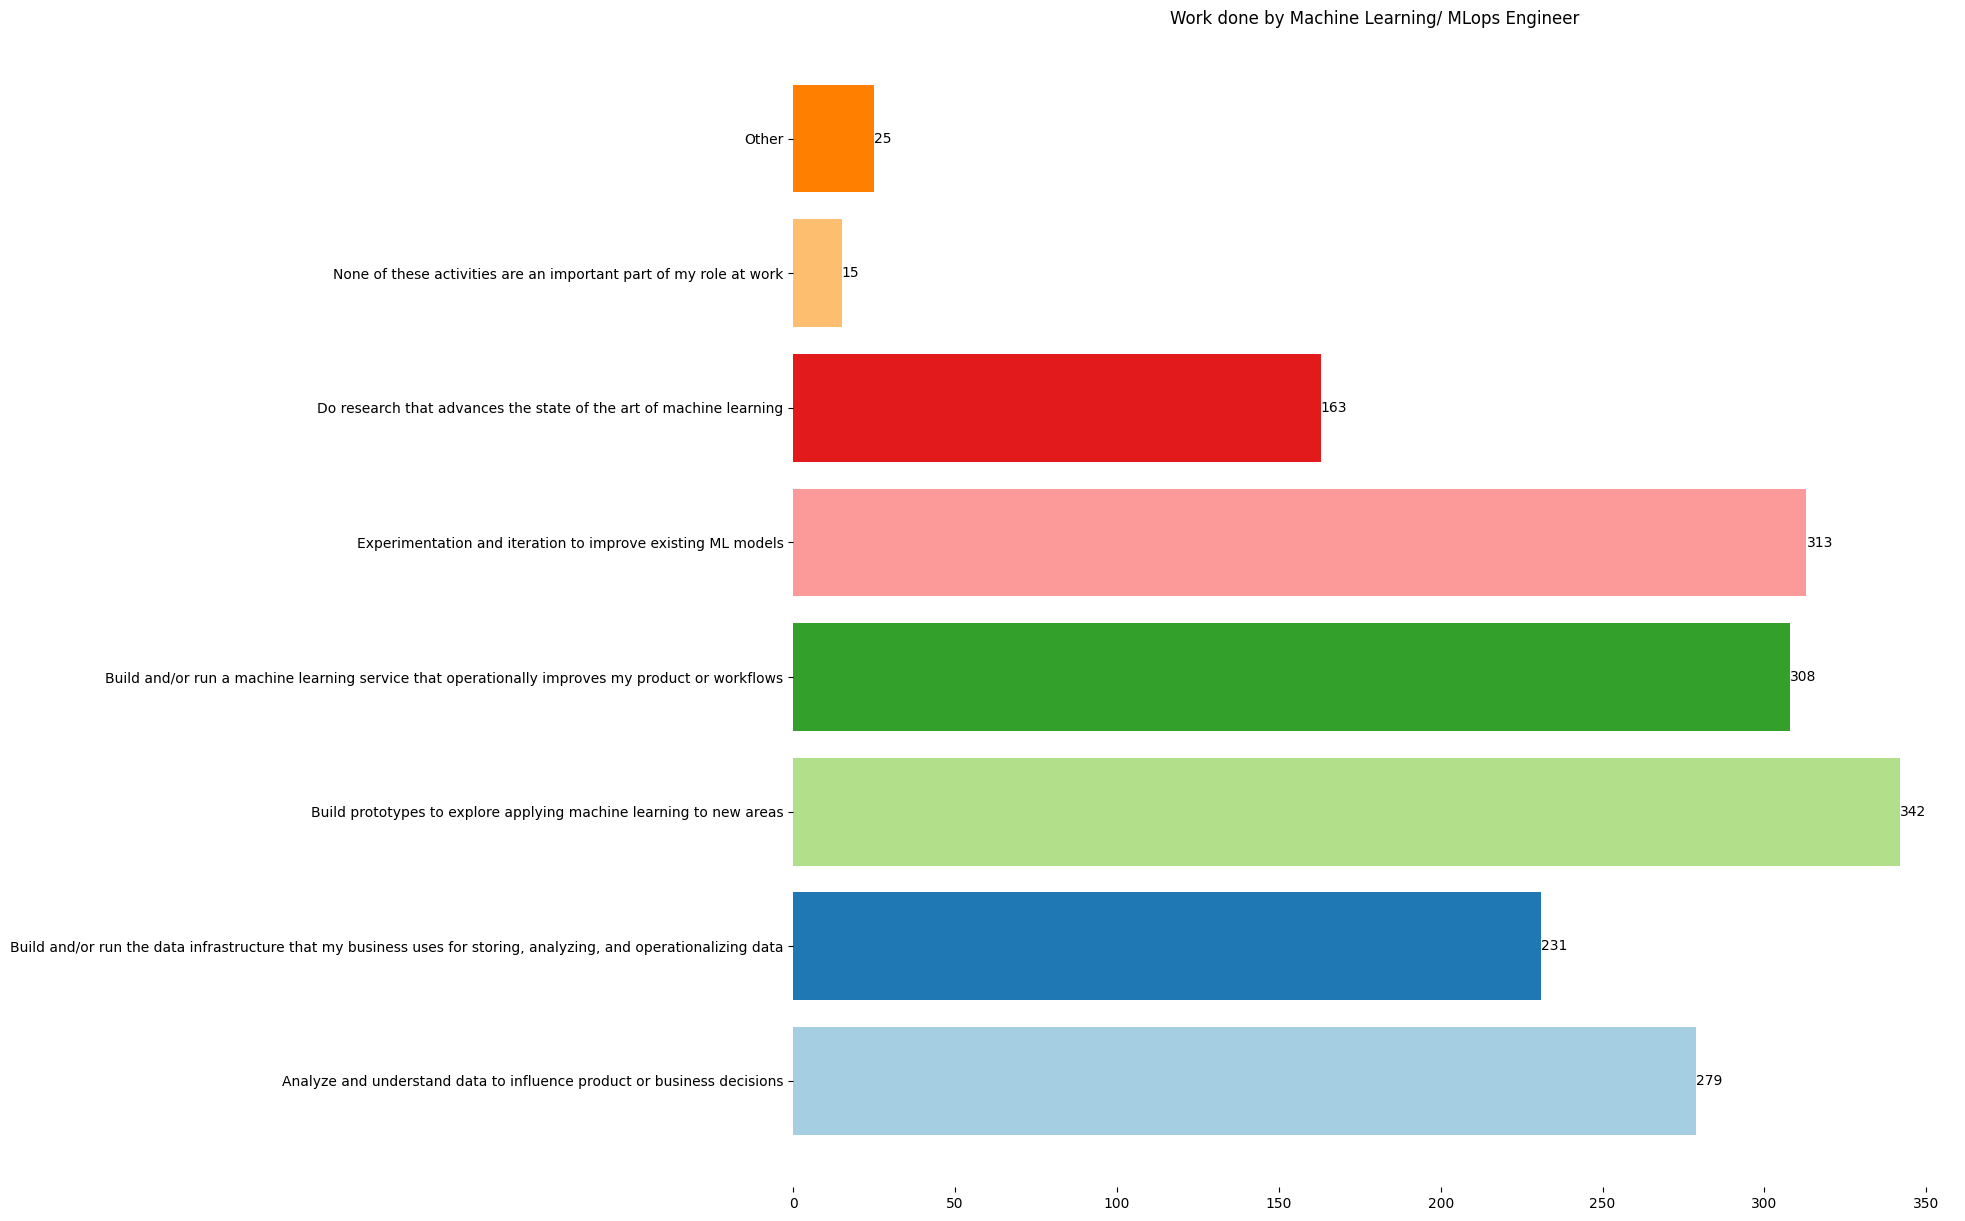

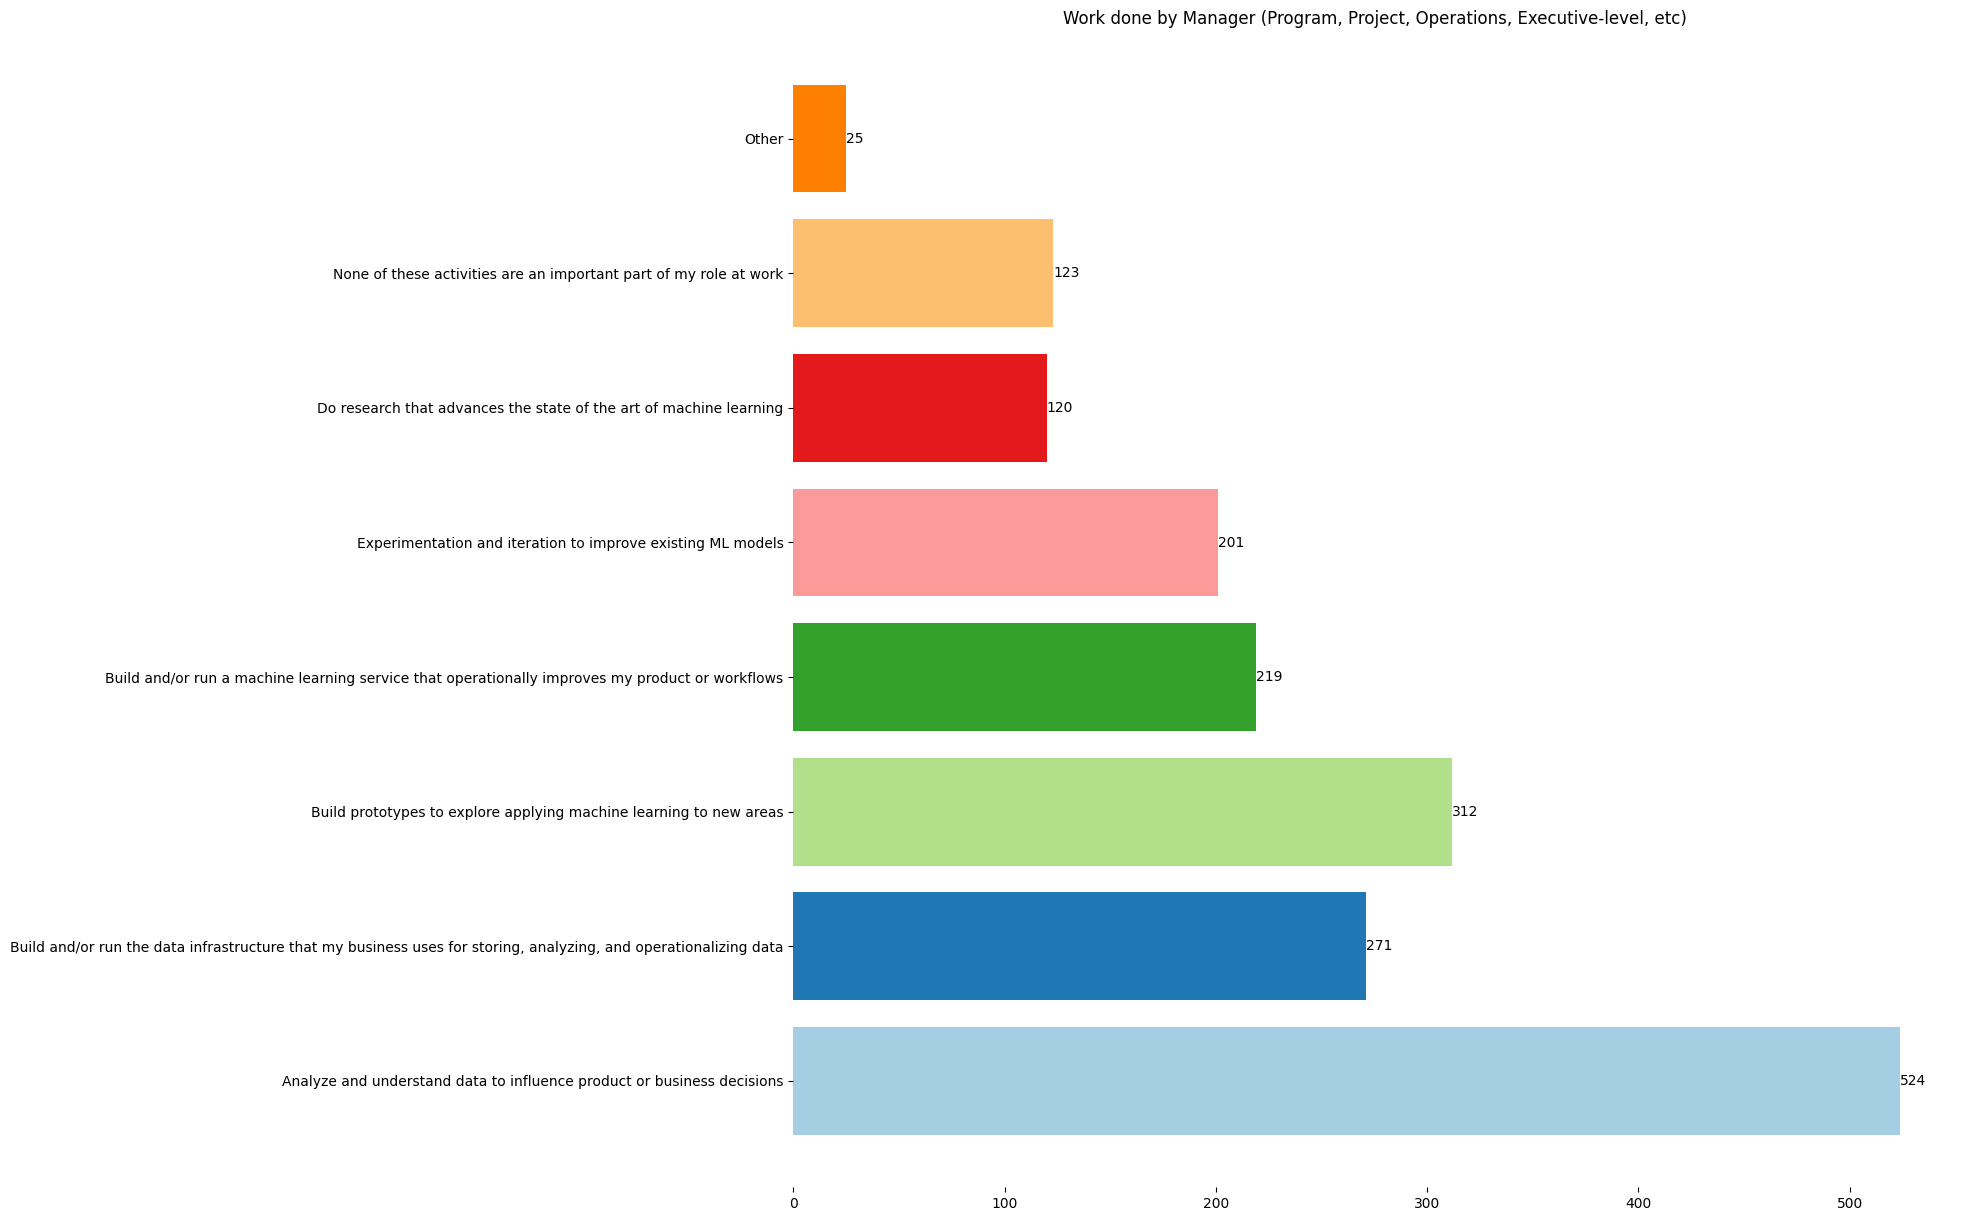

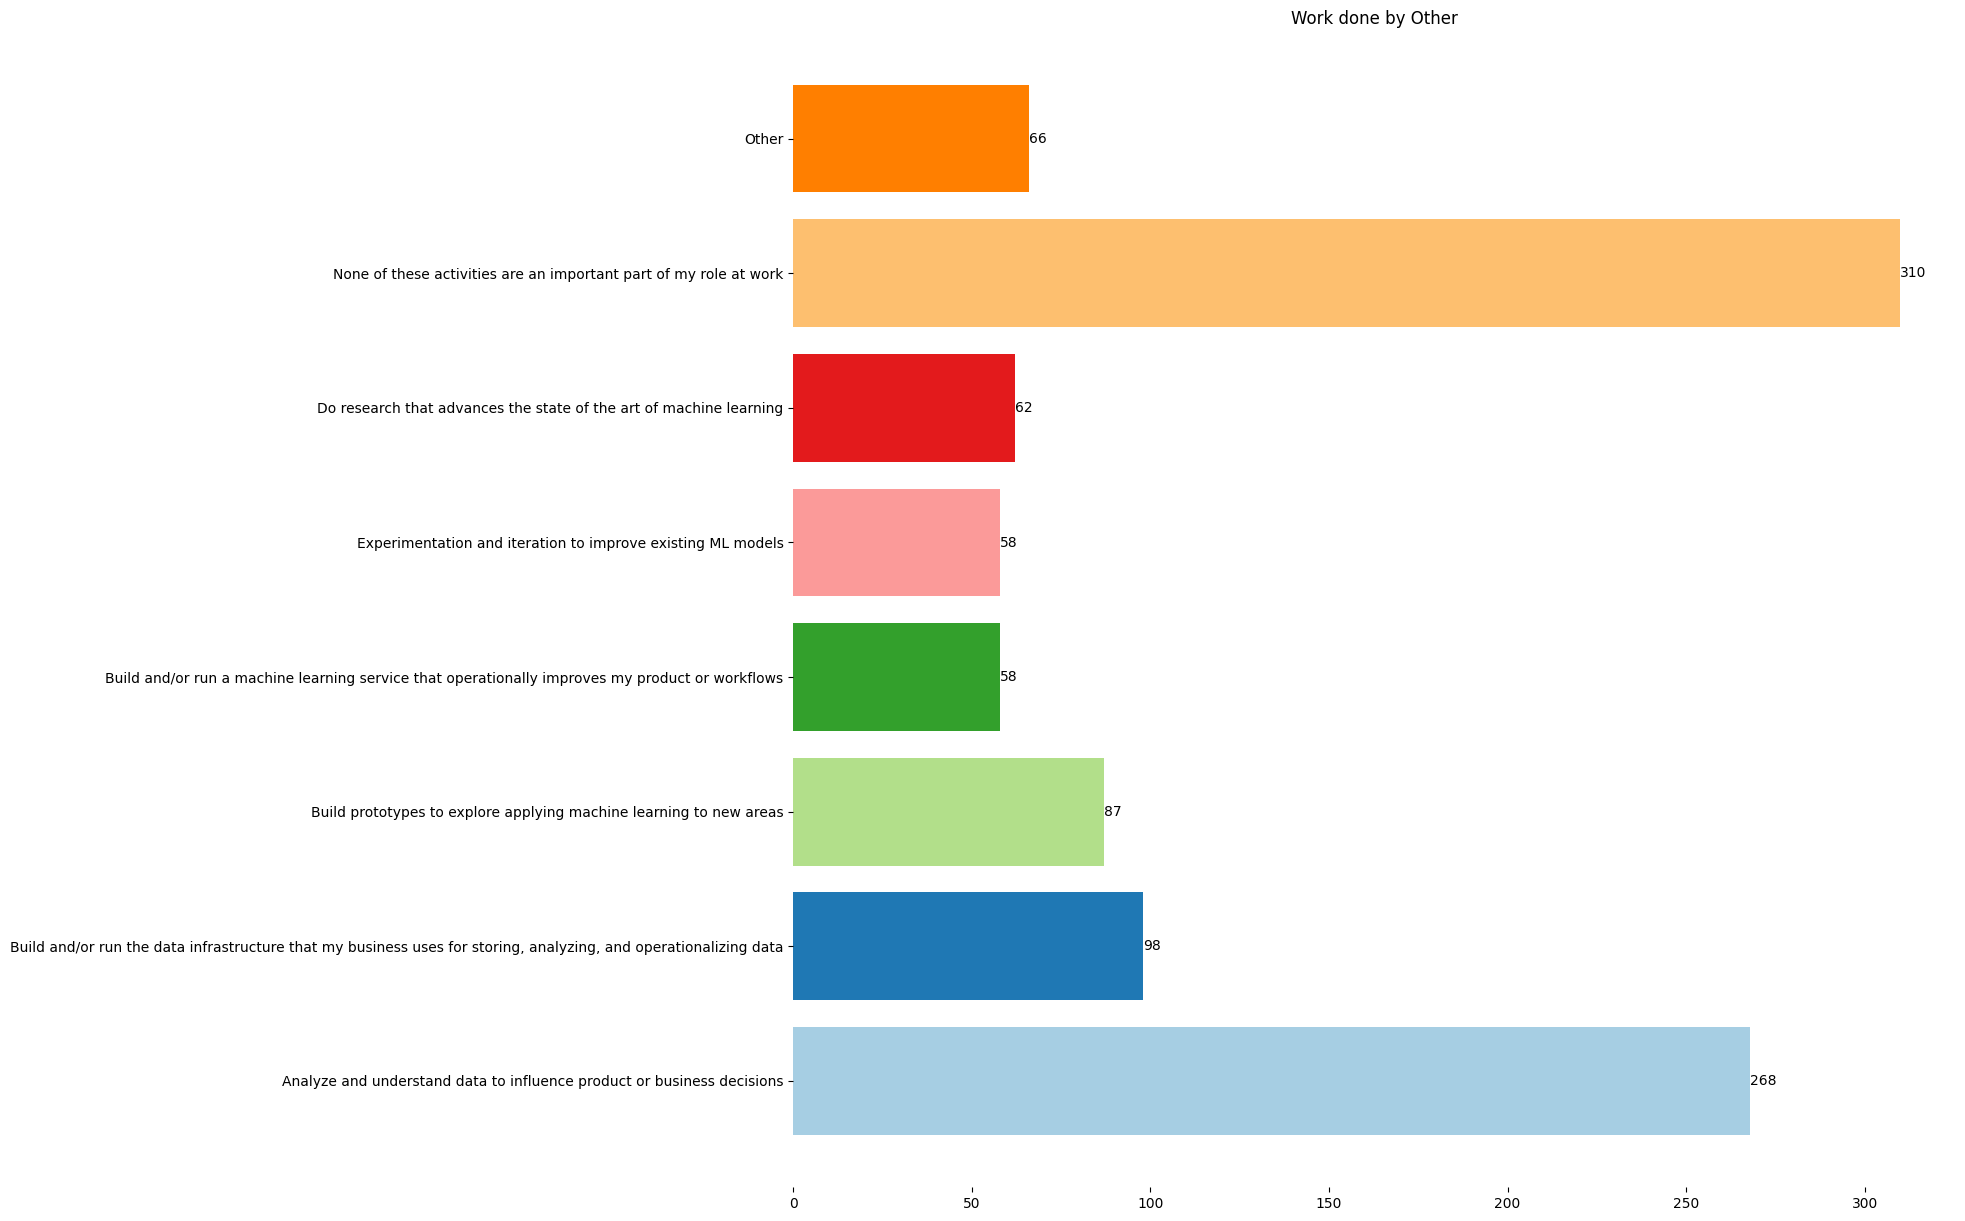

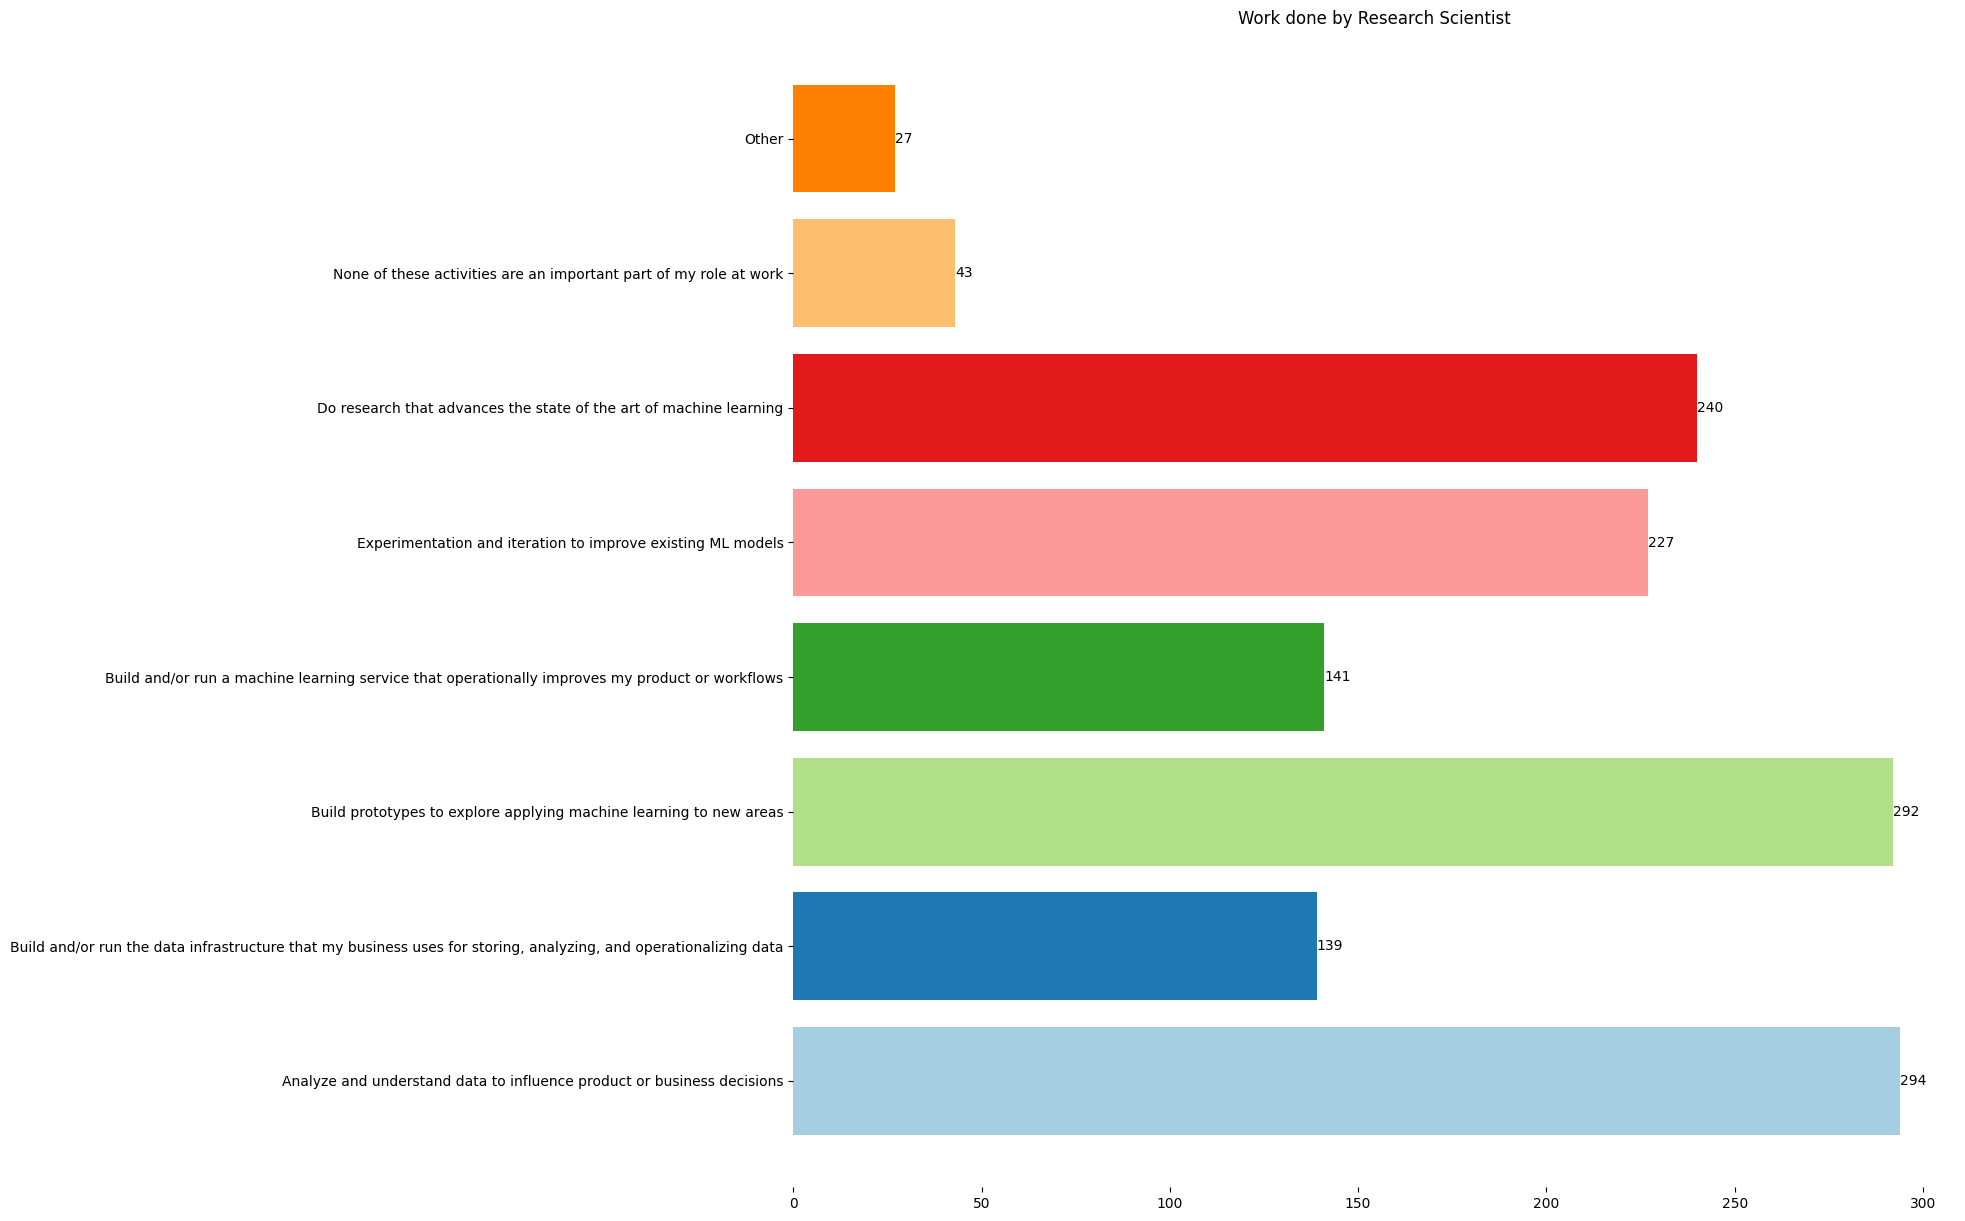

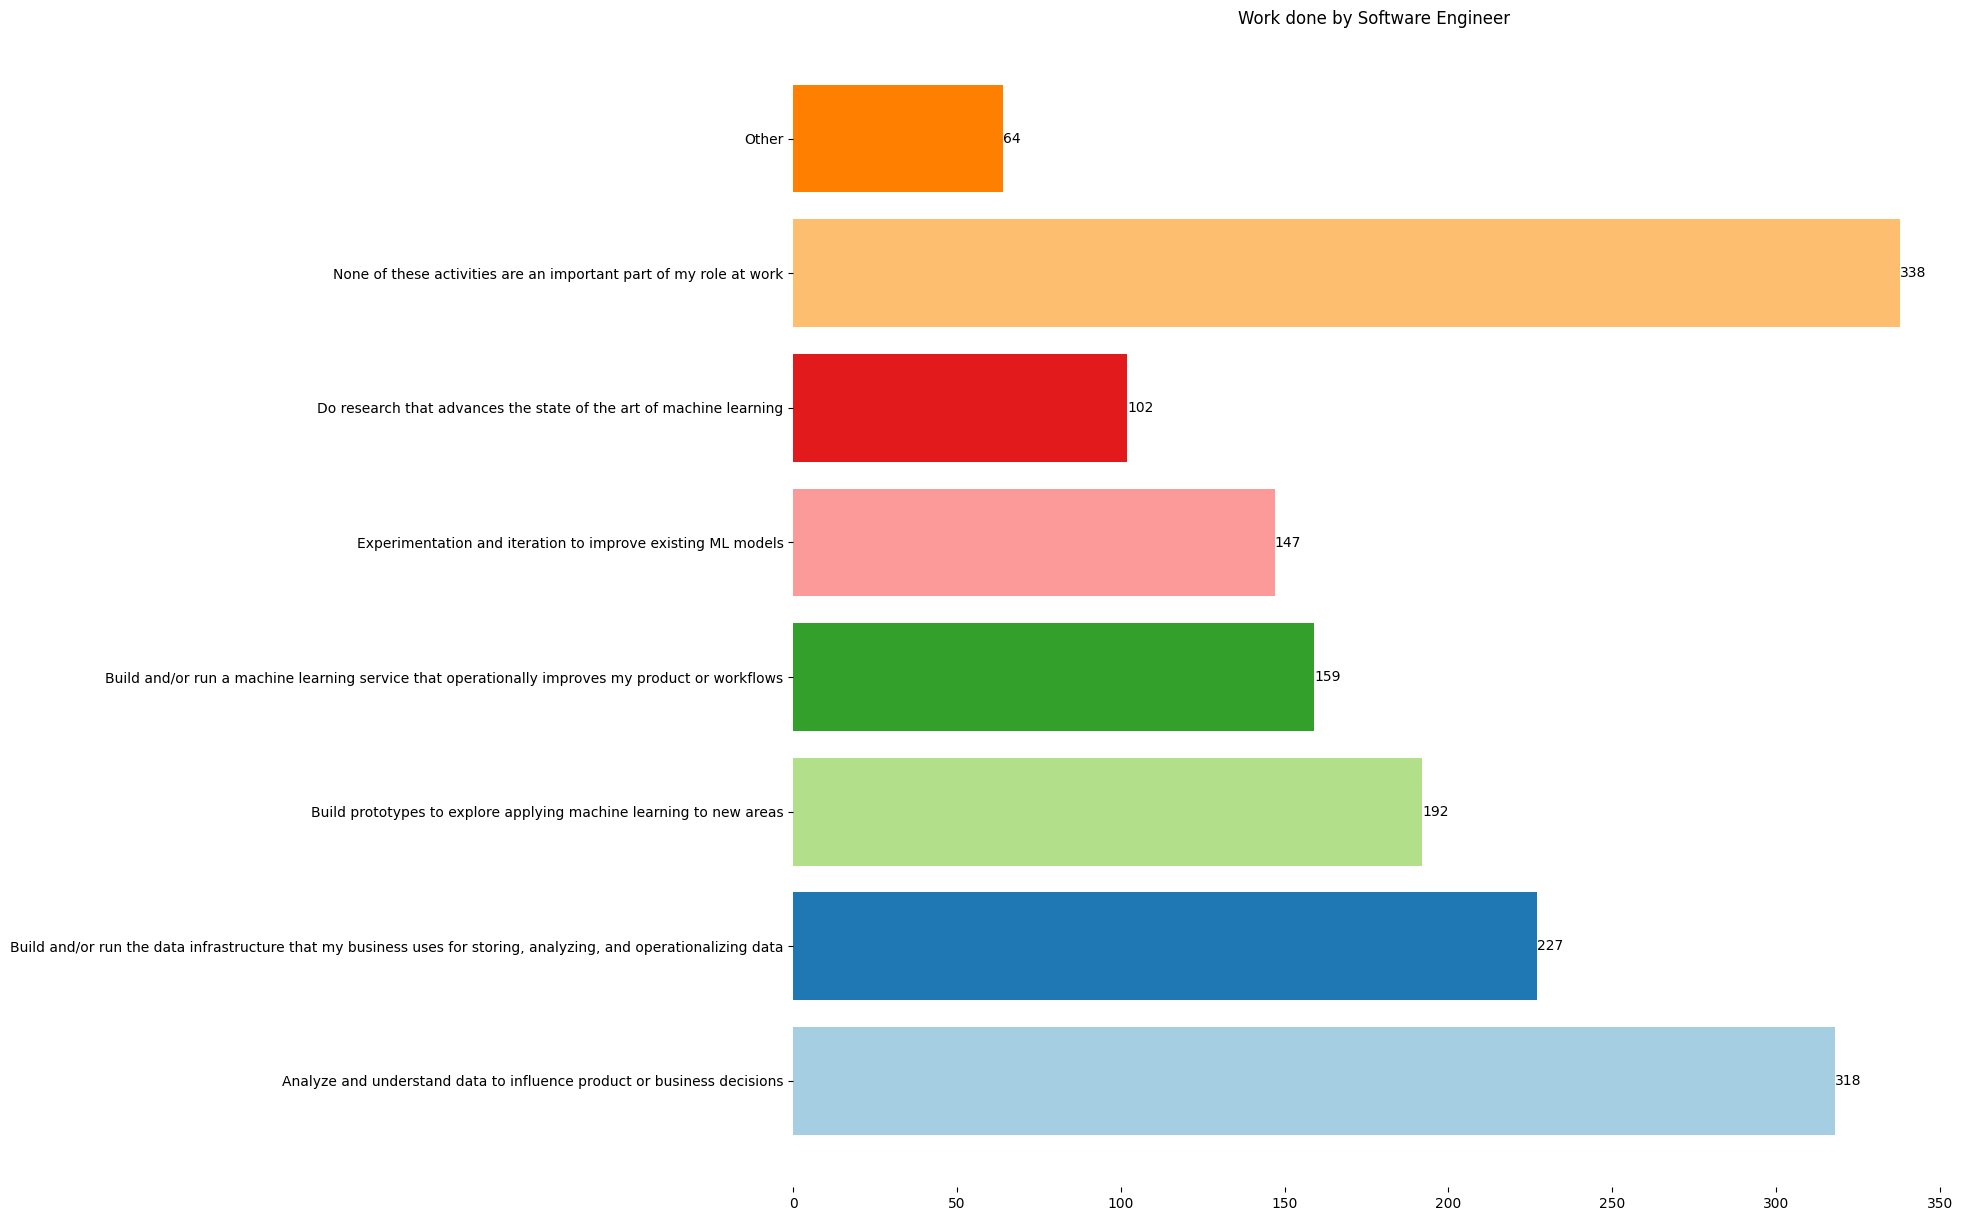

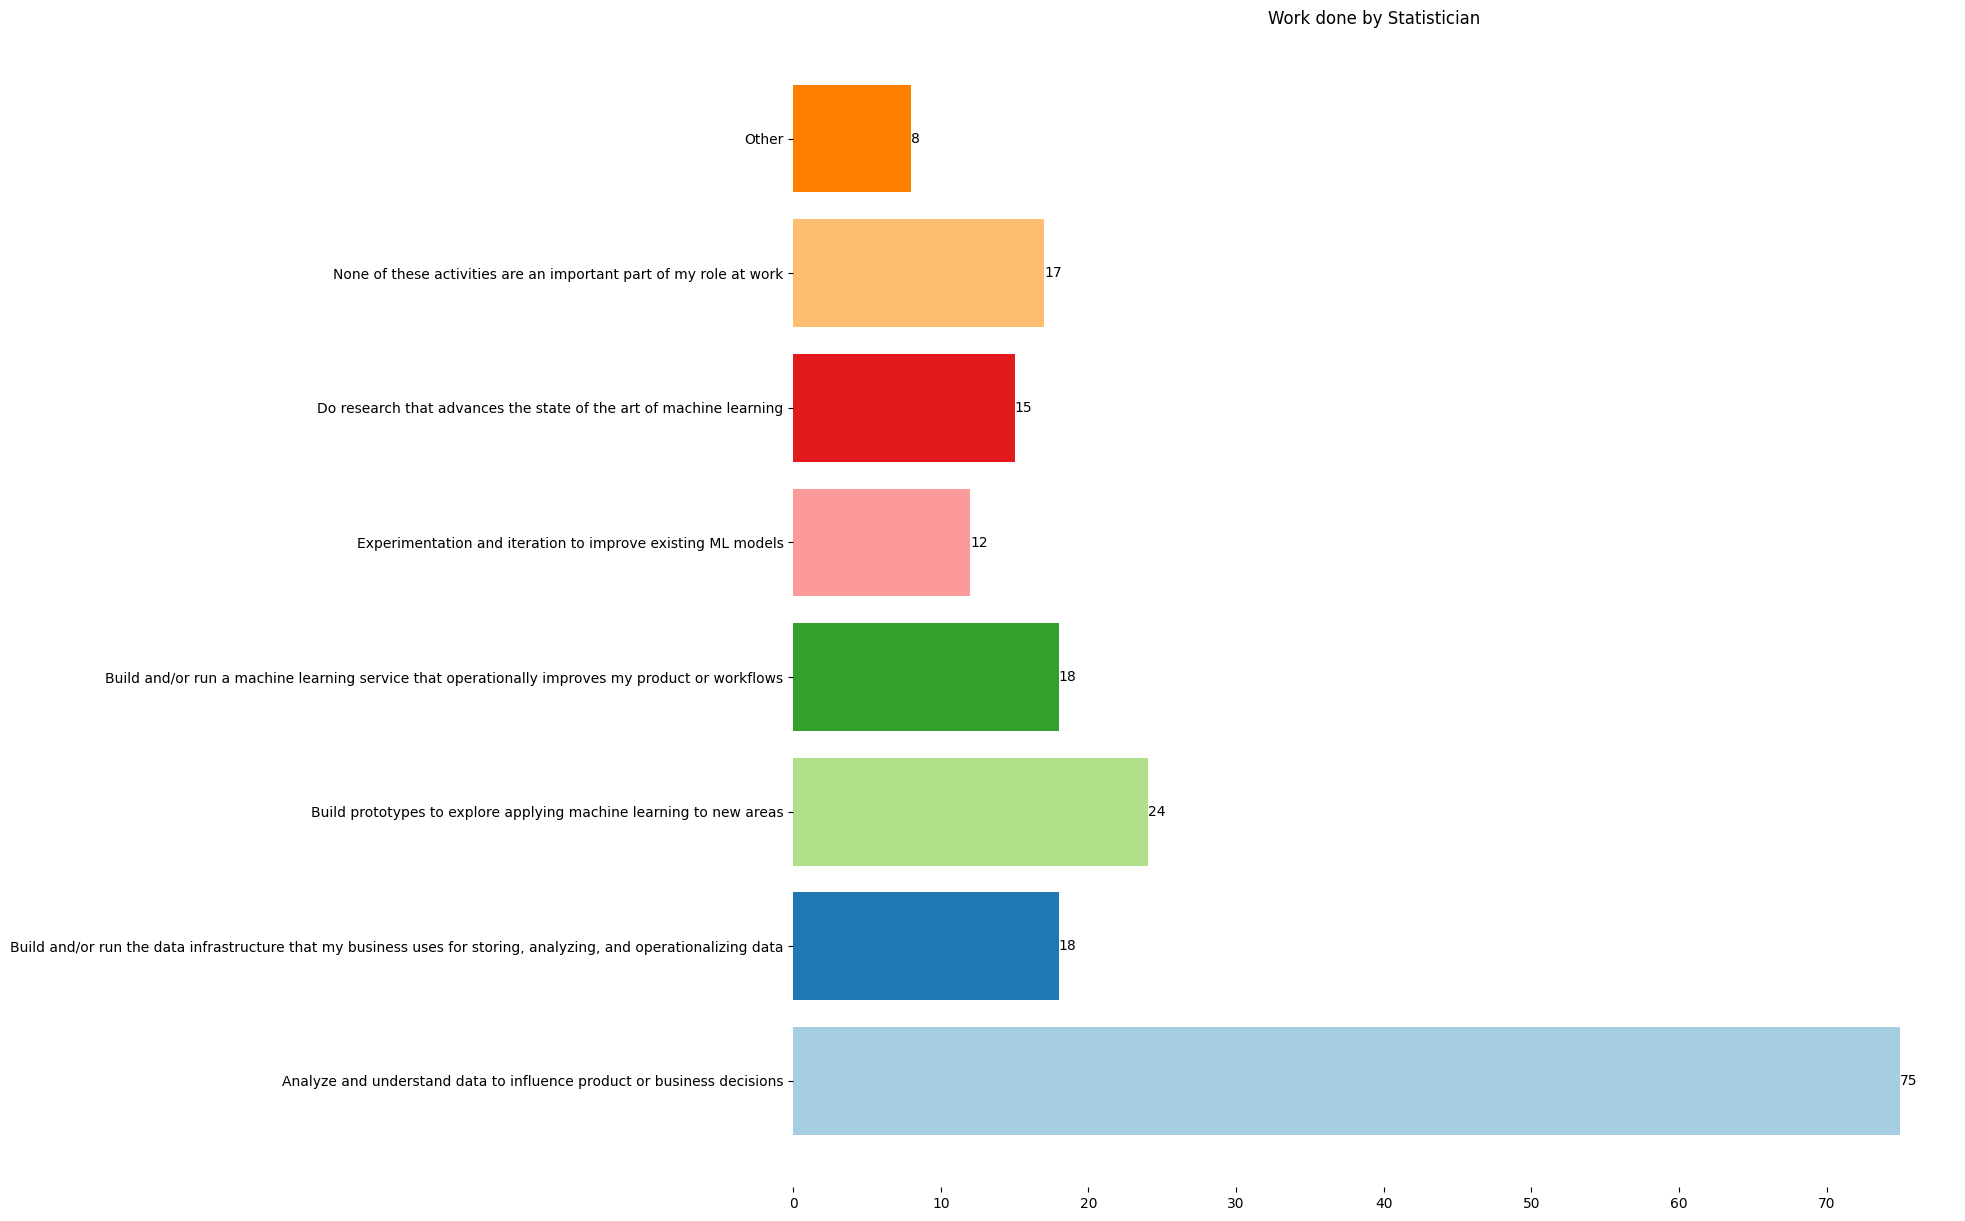

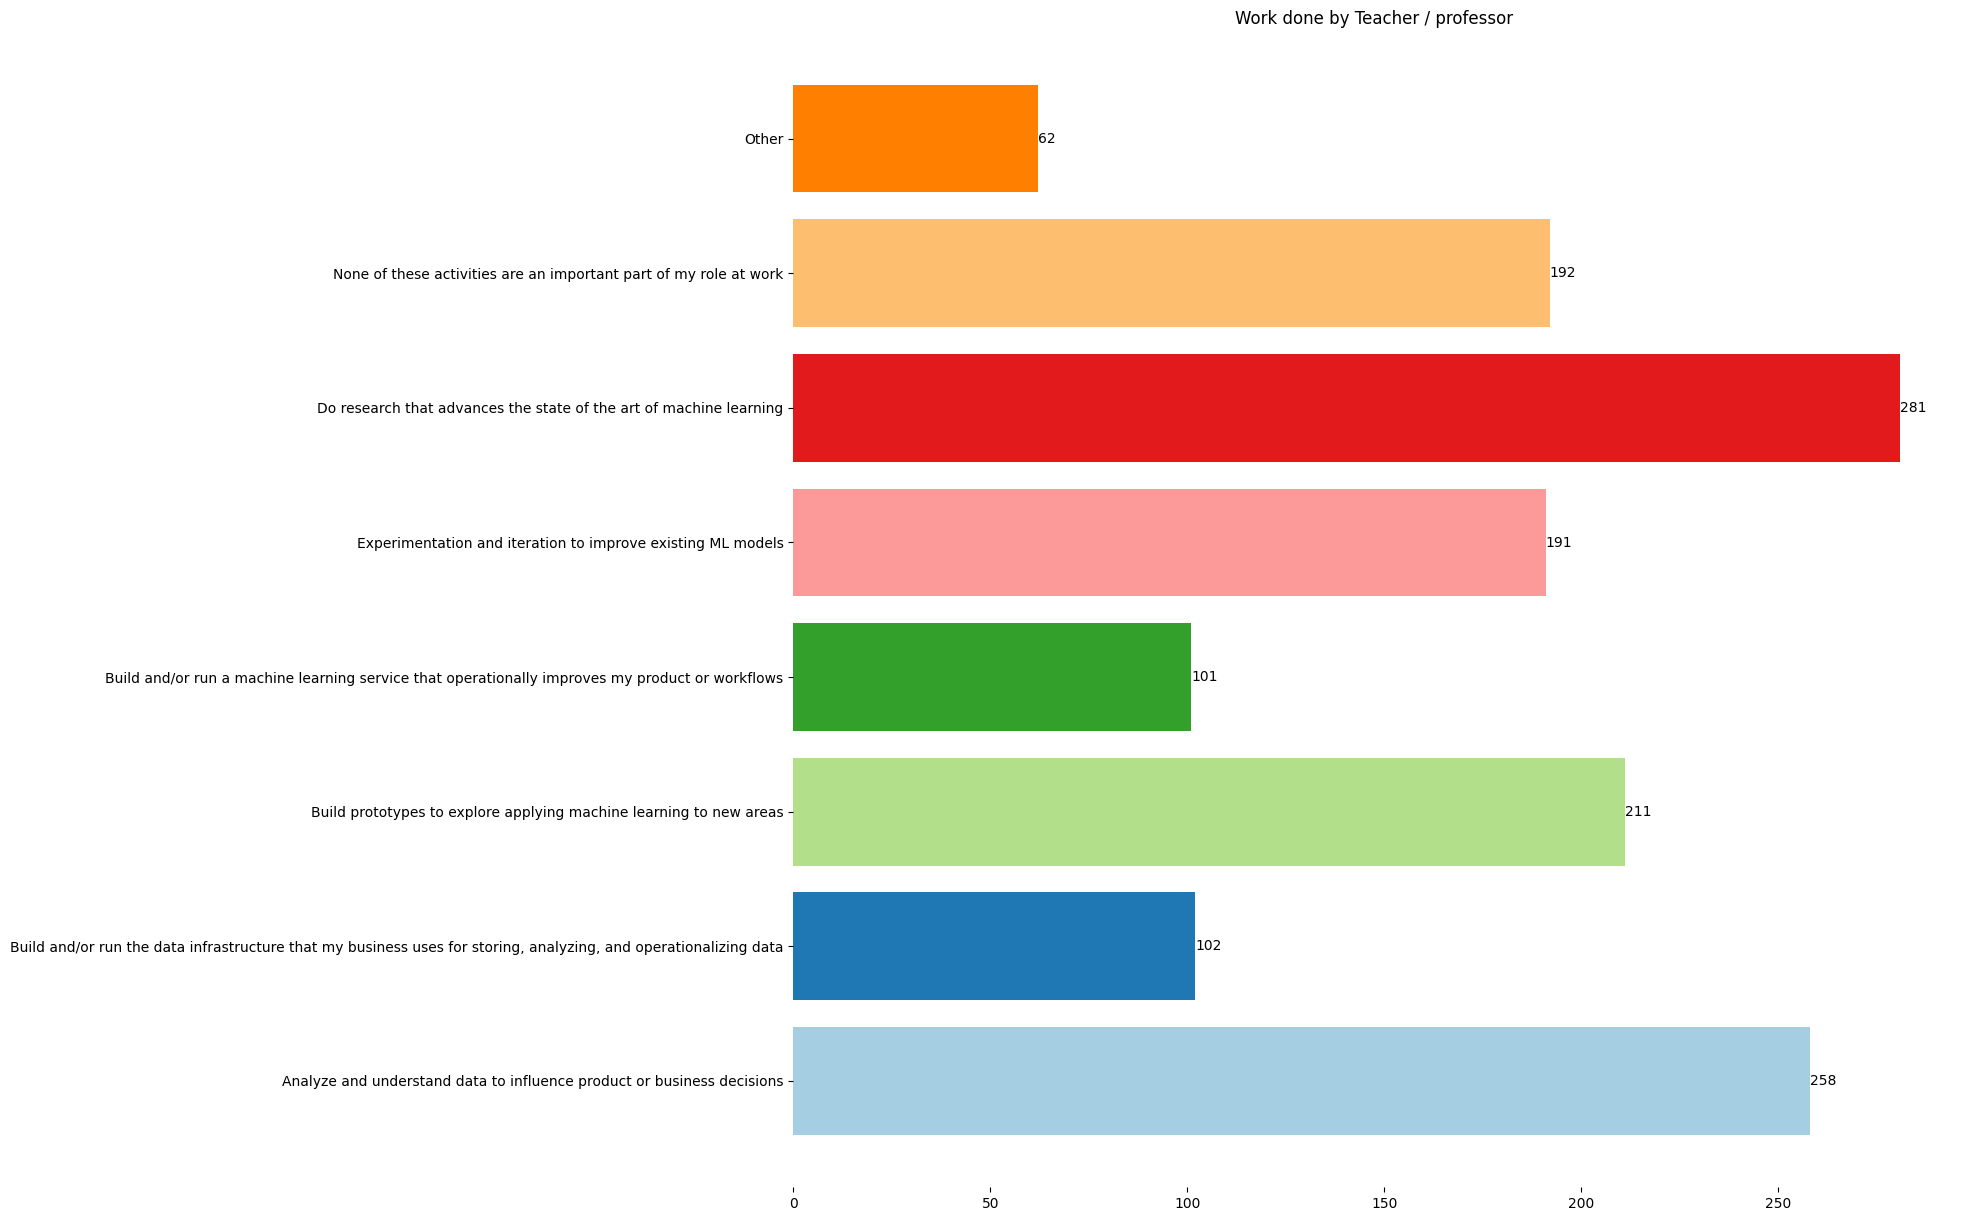

In [32]:
count_indices = list(range(2,df_concat.shape[1], 2))
label_indices = list(range(1, df_concat.shape[1], 2))
for row_index in range(df_concat.shape[0]):
    label_names = df_concat.iloc[row_index,label_indices].values
    count_values = df_concat.iloc[row_index,count_indices].values
    role = df_concat.iloc[row_index,0]
    custom_palette = sns.color_palette("Paired", 8)
    sns.set_palette(custom_palette)
    fig, ax = plt.subplots(figsize=(15,15))
    bars = plt.barh(y=label_names,width=count_values, color=[c for c in custom_palette])
    ax.set_title(f"Work done by {role}")
    ax.bar_label(ax.containers[0])
    ax.set_frame_on(False)